# **1. Introduction**
--------------------------------------------------------------

## **Title**  : *SenSee*

### **Under the Sun: Exploring Sunscreen Sentiments on X**

**Members** :

1. Kumala Cantika Ainun Maya : Data
2. Putra Rizqa Yasira : Data

### **Problem Statement** :

Sunscreen is a fundamental skincare product essential for protecting against harmful UV rays. Despite its importance, understanding consumer perceptions and sentiments towards various sunscreen products remains challenging due to the vast amount of online feedback spread across multiple platforms. Manual analysis of this feedback is impractical and time-consuming, making it difficult to extract actionable insights that can inform product development and marketing strategies. Therefore, an automated system to accurately identify and analyze customer sentiment towards sunscreen products is needed to bridge this gap and provide timely, precise insights.

### **Background** :

Sunscreen products are widely used by the community for their protective properties against UV rays, making them a crucial part of daily skincare routines. With the growing usage of social media and online review platforms, consumers continuously share their experiences and opinions about these products. However, this vast amount of data is both a challenge and an opportunity. Companies struggle to efficiently process and interpret this data to understand customer sentiment and improve their products and strategies. The Sentiment Sunscreen (SenSee) project aims to leverage Natural Language Processing (NLP) to automate sentiment analysis, distinguishing between affiliated (e.g., sponsored reviews) and non-affiliated sentiments. By delving deeper into netizens' true views on sunscreen products, SenSee will generate sharp insights that are invaluable for consumer analytics and strategic decision-making.

### **Objective** :

- **Develop an NLP Model**: Create a robust NLP model capable of accurately identifying and categorizing customer sentiment towards sunscreen products.
- **Automate Sentiment Analysis**: Implement an automated system to collect, preprocess, and analyze customer feedback on a weekly basis.
- **Distinguish Sentiment Types**: Differentiate between affiliated and non-affiliated sentiments to ensure the accuracy and reliability of the insights.
- **Provide Actionable Insights**: Generate detailed reports and visualizations that offer actionable insights into consumer perceptions, aiding in product improvement and marketing strategies.





# 2. Import Library

In [1]:
import re
import nltk
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from nltk.corpus import stopwords

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
nltk.download('stopwords')
nltk.download('punkt')
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras.layers import Embedding
from tensorflow.keras.callbacks import EarlyStopping

import tensorflow as tf

from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, GRU, Dropout, Reshape
from sklearn.metrics import classification_report



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ptrysr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ptrysr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# 2. Data Loading

In [2]:
df = pd.read_csv("sunscreen_labeled_data.csv")

In [3]:
df

,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,Affiliate,Sentiment
0,@avoskinbeauty Aku mau Sunscreen Avoskin The G...,1.796108e+18,NaN,fairinez,in,INA 🇮🇩,0,0,0,https://x.com/fairinez/status/1796108249730556044,2.833597e+09,fairinez,0,1
1,@harurutrvs_ skintype akuu combi oily dan lgi ...,1.795805e+18,NaN,harurutrvs_,in,04z,0,0,0,https://x.com/fairyynaa/status/179580496548057...,1.185125e+18,fairyynaa,0,2
2,@harurutrvs_ toner: refining toner avoskin (IN...,1.795790e+18,NaN,harurutrvs_,in,01z,0,1,0,https://x.com/5junkyu/status/1795789937708548200,1.356344e+09,5junkyu,0,1
3,Cek YSB Shield of Sun Essence SPF 50 PA++++ 5 ...,1.795665e+18,NaN,NaN,in,Kebumen,0,0,0,https://x.com/EvermosSStore2/status/1795664687...,1.506227e+18,EvermosSStore2,1,2
4,@ohmybeautybank aku pake avoskin bagus sih tp ...,1.795421e+18,NaN,ohmybeautybank,in,♡,0,3,1,https://x.com/seyaseyi/status/1795421452956828021,2.682044e+08,seyaseyi,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5449,@Starrynight_131 Kira kira kalo dipakein sunsc...,1.791366e+18,NaN,Starrynight_131,in,NaN,0,0,0,https://x.com/131everyday/status/1791365549559...,1.301659e+18,131everyday,0,2
5450,@swtsjki kulitnya udh ada sunscreen alaminya i...,1.791365e+18,NaN,swtsjki,in,fan and dump acc,0,0,0,https://x.com/chyled0ux/status/179136518941962...,1.559813e+18,chyled0ux,0,1
5451,@hyaluronicc__ Ini sunscreen wardah terenak me...,1.791364e+18,NaN,hyaluronicc__,in,candraulfatun@gmail.com,0,0,0,https://x.com/bulbulkun/status/179136416309433...,9.726322e+17,bulbulkun,0,1
5452,@ohmybeautybank Nggaaa sunscreen ama lipstik d...,1.791363e+18,NaN,ohmybeautybank,in,NaN,0,0,0,https://x.com/neferefel/status/179136329218915...,4.983727e+07,neferefel,0,2


# 3. Data Handling

## 3.1 - Handling Data Duplicates

In [4]:
df.duplicated().sum()


158

In [5]:
df = df.drop_duplicates()

In [6]:
df.duplicated().sum()


0

In [7]:
df['full_text'].duplicated().sum()

86

In [8]:
df = df.drop_duplicates(subset='full_text', keep="first")

In [9]:
df['full_text'].duplicated().sum()


0

## 3.2 Handling Missing Value Columns Affiliate and Sentiment

In [10]:
df['Affiliate'].isna().sum()


0

In [11]:
df['Sentiment'].isna().sum()

0

# 4. Exploratory Data Analysis (EDA)

In [12]:
# Drop all of columns except `full_text`, `Affiliate`, `Sentiment`
df = df.drop(['id_str', 'image_url', 'in_reply_to_screen_name', 'lang', 'location', 'quote_count', 'reply_count', 'retweet_count', 'tweet_url', 'user_id_str', 'username'], axis=1)

## 4.1 - Affiliate

In [13]:
print(f'Affiliate 0 :', len(df[df['Affiliate']==0]))
print(f'Affiliate 1 :', len(df[df['Affiliate']==1]))

Affiliate 0 : 3998
Affiliate 1 : 1212


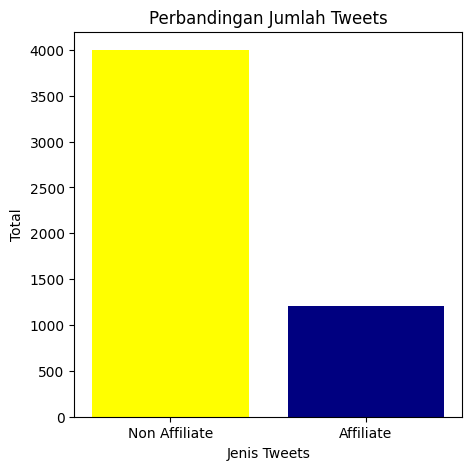

In [14]:
# Visualisasi perbandingan jumlah tweets affiliate dan non affiliate
labels=["Non Affiliate","Affiliate"]
values = df['Affiliate'].value_counts()
plt.figure(figsize = (5,5))
plt.bar(labels, values, color=['yellow', 'navy','violet'])
plt.xlabel('Jenis Tweets')
plt.ylabel('Total')
plt.title('Perbandingan Jumlah Tweets')
plt.show()

## 4.2 - Sentiment

In [15]:
print(f'Sentiment 0 :', len(df[df['Sentiment']==0]))
print(f'Sentiment 1 :', len(df[df['Sentiment']==1]))
print(f'Sentiment 2 :', len(df[df['Sentiment']==2]))
print(f'Sentiment 3 :', len(df[df['Sentiment']==3]))

Sentiment 0 : 1188
Sentiment 1 : 2014
Sentiment 2 : 1340
Sentiment 3 : 668


In [16]:
# Drop Sentiment = 3, karena berisi skincare routine tanpa sentiment
df.drop(df[df.Sentiment == 3].index, inplace=True)

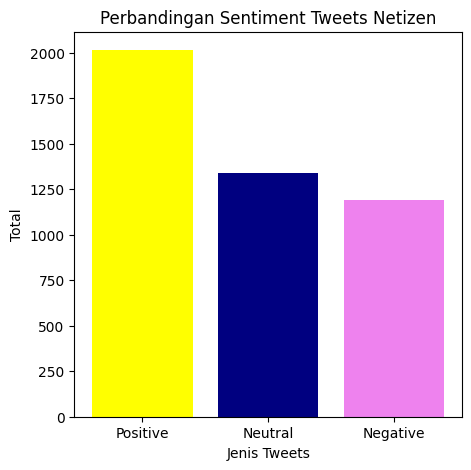

In [17]:
# Visualisasi perbandingan jumlah sentimen tweets netizen
labels=["Positive","Neutral","Negative"]
values = df['Sentiment'].value_counts()
plt.figure(figsize = (5,5))
plt.bar(labels, values, color=['yellow', 'navy','violet'])
plt.xlabel('Jenis Tweets')
plt.ylabel('Total')
plt.title('Perbandingan Sentiment Tweets Netizen')
plt.show()

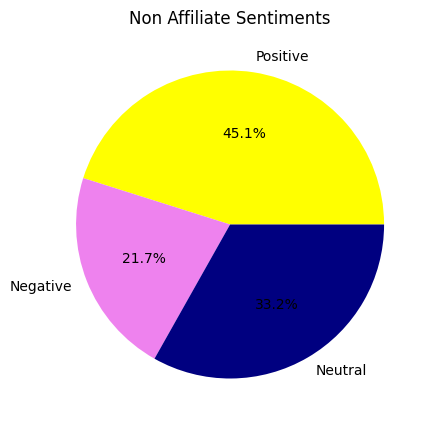

In [18]:
nonaff_pos = len(df[(df['Affiliate']==0)&(df['Sentiment']==1)])
nonaff_neg = len(df[(df['Affiliate']==0)&(df['Sentiment']==0)])
nonaff_neu = len(df[(df['Affiliate']==0)&(df['Sentiment']==2)])
# Visualisasi pie perbandingan non affiliate tweets dengan sentiment netizen
plt.figure(figsize=(5, 5))
plt.pie([nonaff_pos,nonaff_neu,nonaff_neg,], labels=['Positive', 'Negative','Neutral'], autopct='%1.1f%%', colors=['yellow', 'violet', 'navy'])
plt.title('Non Affiliate Sentiments')
plt.show()

# 5. Text Preprocessing

In [19]:
df

,full_text,Affiliate,Sentiment
0,@avoskinbeauty Aku mau Sunscreen Avoskin The G...,0,1
1,@harurutrvs_ skintype akuu combi oily dan lgi ...,0,2
2,@harurutrvs_ toner: refining toner avoskin (IN...,0,1
3,Cek YSB Shield of Sun Essence SPF 50 PA++++ 5 ...,1,2
4,@ohmybeautybank aku pake avoskin bagus sih tp ...,0,1
...,...,...,...
5449,@Starrynight_131 Kira kira kalo dipakein sunsc...,0,2
5450,@swtsjki kulitnya udh ada sunscreen alaminya i...,0,1
5451,@hyaluronicc__ Ini sunscreen wardah terenak me...,0,1
5452,@ohmybeautybank Nggaaa sunscreen ama lipstik d...,0,2


## 5.1 - Define Stopwords and Stemming

In [20]:
# Define Stopwords
stpwds_id = list(set(stopwords.words('indonesian')))
stpwds_id = stpwds_id + ['ygy', 'please', 'blm', 'and', 'ml', 'hanya', 'lah', '(...)', 'u', 'aja', 'kl', 'gw', 'yaaa', 'uns', 'lgsg', 'rep', 'yuk', 'tau', 'ajaa', 'garn&amp;&amp;&amp;',
                  '(sisaan)', 'gua', 'yaallah', 'guaaa', 'rip', 'my', '200k', 'bgt', 'ss', 'n', 'kak', 'bbrp', 'cod', 'tanya', '&amp;', 'ttp', 'tp', 'kl', 'krn', 'sblm', 'sih',
                  'bbjirr', 'kuy', 'laa', 'tpi', 'hadalabo', 'pyunkang', 'yul', 'azarine', 'cosrx', 'sunscreen', 'gokujyun', 'brand', 'paragon', 'pro', 'palestine', 'wardah', 'emina',
                  'kahf', 'skintific', 'maybelline', 'vinyl', 'ink', 'vaseline', 'gluta', 'hya', 'somethinc', 'loreal', 'physical', 'skin1004', 'madagascar', 'sm', 'org', 'loreal',
                  'paris', 'defender', 'invisible', 'fluid', 'serum', 'skincare', '30ml', 'toner', 'essence', 'snail', 'micellar', 'water', 'originate', 'lorealparisid', 'reply',
                  'checkout', 'makeover', 'powerstay', 'foundation', 'c31', 'glossy', 'stain', 'sariayu', 'oil', 'revitalift', 'ha', 'panorama', 'lipmatte', 'wkwk', 'rm75++', 'niacinamide',
                  'sea', 'makeup', 'foundie', 'cushion', 'copypaste', 'nina', 'centella', 'poremizing', 'glycolic', 'bright', 'cream', 'hmps', 'whitelab', 'anessa', 'moisturizer', 'lanbena',
                  'marine', 'collagen', 'hyacross', 'cerave', 'retinol', 'el formula', 'pink', 'npure', 'skinaqua', 'karena', 'biore', 'implora', 'elformula', 'powder', 'esqa', 'lip',
                  'dettol', 'red', 'jelly', 'exfoliating', 'ungu', 'scrub', 'hyaluron', 'peptides', 'sunbrella', 'isriwil', 'fot', 'zonaba', 'zonabu', 'zonajajan', 'fss', 'skinitip',
                  'skintype', 'hydrium', 'layered', 'illiyoon', 'ceramide', 'dexskin', 'derna', 'express', '3w', 'cli0nic', 'somebymi', 'senka', 'eye', 'citra', 'pepsodent', 'lipstick',
                  'handbody', 'pata', 'usruk2', 'tjoyy', 'softymo', 'cetaphil', 'phisical', 'my', 'salicylic', 'acid', 'congested', 'invisible', 'fluid', 'kecit', 'yutup', 'tt', 'sunblock',
                  'hybrid', 'spf', 'yagesya', 'maba', 'mahasiswi', 'indomar*t', '100rbun', 'fw', 'eyeshadow', 'liquid', 'eneles', 'discontinue', 'pixy', 'yuja', 'niacin', 'witch', 'hazel',
                  'rojukiss', 'gold', 'cyclopentasiloxane', 'holyshield', 'corrector', 'ingridientnya', 'copy', 'paste', 'tinted', 'co1', 'perle', 'available', 'carousell', '(cont)', 'c02',
                  'serene', 'zonauang', 'butter', 'w01', 'w03', 'pons', 'himalaya', 'facetology', 'nivea', 'avoskin', 'airnderm', 'animate', 'corxs', 'sebamed', 'buttered', 'rose', 'madame',
                  'gie', 'natrep', 'garnier', 'hale', 'comfort', 'zone', 'tribiotic', 'elsheskim', 'phantenol/smtc', 'calmdown', 'nderr', 'shinzui', 'marina', 'dayang2mu', 'princess',
                  'prajurit', 'care&amp;protect', 'larang', 'wae', 'sing', 'pokoke', 'hv', 'paling2', 'scarlett', 'klinik', 'receptionist', 'xiu', 'xiu(?)', 'eco', 'tan', 'safi', 'dermasafe',
                  'skinker', 'cica', 'waterfit', 'manyo', 'toba', 'metal', 'fortis', 'hanasui', 'dermies', 'alba', 'laneige', 'dermatologist', 'koji', 'speed', 'cappadocia', '⬇️', 'ertos',
                  'dirgie', 'originot', 'amaterasun', 'jf', 'sulfur', '⭐', '🆕', 'belia', 'carasun', 'bpom', '8ml', '70ml', 'kita', 'loose', 'matte', 'yellow', 'btw', 'beat', 'the', 'sun',
                  'with', '3-in-1', 'bring', 'green', 'acnes', 'scora', 'mask', 'aha', 'bha', 'ultra', 'aloe', 'vera', '4d', 'msh', 'selebgram', 'fahiram', 'miraa', 'tiktokers', 'sachet',
                  'blue', 'light', 'buddies!', 'tts', 'ktnya', '4tahunan', 'spray', 'hi', 'beudd', '#carasunbuddies', 'e*em', 'elshe', '⤵️', '&gt;', '[kotak', 'hadiah]', 'mr. diy', 'labore',
                  'diskon', '6.6', 's/d', '60%', 'anyg', 'watson(?)', 'bjrotlah', 'spray', 'bnb', 'rebiu', 'tak', 'berbayar:', 'vs', 'y.o.u', 'cloud', 'touch', 'loreal', '5.5', 'golden',
                  'sand', 'routine:', 'jinot', 'skintific/kleveru', 'wkakkwkwkaakwka', 'mist', 'rp77.000', 'skunk', '[nicholas', 'saputra', 'choice]', 'spf50', 'pa++++', 'zarzou', 'fuji',
                  'sandra', 'dewi', 'nahan', 'geby', '2minggu', 'pipiqiu', 'cinamoroll', 'dekahnya', 'pure', 'paw', 'shopee', 'lazada', 'fdx', 'jastip', 'jxb', 'blibli', 'tele', '(jar', 'ijo)',
                  '⭐⭐', 'nyahh', 'om-om', 'hatewavenya', 'anthelios', 'uvmune', '400', 'oil', 'control', 'fluid', 'spf50+', 'pa++++', '50ml', 'barenbliss', 'r-cover', 'cicaplast', 'baume',
                  'b5', 'b5+', 'oxy 5 browcara', 'yogurt', 'kiehls', 'mcm2', 'tocobo', 'isntree', 'effaclar', 'bhumi', 'skinceuticals', 'menstruasi', 'januari', 'spearmint', 'tea', 'lrp',
                  'payar', 'allie', 'kanebo', 'kose', 'torriden', 'dive', 'purito', 'innisfree', 'gel-cream', 'obgynku', 'gweh', 'dr.', 'barbara', 'sturm', 'dressing', 'estée', 'lauder', 'eta',
                  'sept', 'sleman', 'cmiiw', 'bluemarine', 'ampoule', 'kayman', 'moisturiser', 'ceradan', 'gemfou', 'petersons', 'dokter', 'spkk', 'himalayan', '4jt', 'tretinoin', 'segestam',
                  'mois', 'ss-nya', 'tranexamic', 'boj', 'snail~', 'avoskin!', 'niacin/alpha', 'arbutin', 'ref.toner', 'go-to', 'complexion', 'pad!', 'nct', 'istj', 'cercaode+sheetmask',
                  'gerlam/fib/hergarmanah/ciseke', '2-3x/minggu', 'ordinary', 'rich', 'gokyujun', 'oranye', 'ariul', '7days', 'mediklin', 'tr', 'st', 'kinda', 'vitacid', '0.025%', 'skingame',
                  'azarine/facetology', 'glad2glow', 'rojukis', 'hyalucross', 'neem', 'oxy', 'jennskin', 'elsheskin', 'misha', 'bioacne', 'tompi', 'toner-essence', 'panaaas2nya', 'mursida',
                  'oiya', 'adu-duh', 'gabisa', 'deh', 'plis', 'sama', 'gak', 'doang', 'jadi', 'facial', 'foam', 'tapi', 'masih', 'skrg', 'tu', 'gaboleh', 'smp', 'ben', 'pas', 'eh', 'bjirr',
                  'yang', '#kulitsensitif', '#sunscreenaman', '#zincoxide', '#reefsafe', 'ni', 'yak', 'dowoon', 'mau', 'gt', 'ko', 'ini', 'di', 'ter-ringan', 'lgs', 'mbak', 'cmn', 'sgla', 'iye',
                  'zuzur', 'palg', 'fondi', 'sumpa', 'guefak', 'gase', 'kon', 'supergoop', 'gendistalk', 'chocolatos', 'jajan/debit', '3️⃣', 'diemplok', 'jyujyur', 'co', 'atau', 'jg', 'ga', 'si',
                  'pilih', 'guys', 'dong', 'juga', 'sorry', 'oot', 'ada', 'ya?', 'aku', '1x', '(n01)', 'swatch', 'on', 'by', 'request', 'ini!', 'untuk', 'dari', 'bnr2', 'akan', 'nah', 'ah', 'iya',
                  'itu', 'lain?', 'pad!', 'ciws', 'klo', 'thx', 'uu', 'hai', 'kdg', 'kmrn', 'ᯓ', 'dasdes', "that's", 'why', 'asliii', 'ssnya', '-dips!', '->', 'insyallah', 'u__u', 'dkk', 'jd',
                  '(w)', ':->', 'update', '!!', 'b1g1', 'mascara', 'nextguele', 'bijoux', 'shade', 'naavagreen', 'bondak', 'wtt', 'exfo', 'nder', '^__^', 'dom', 'punten', 'haul', 'foundi', 'loose',
                  'fcdabf', 'loreal', 'ignorant', 'klairs', 'grace&amp;glow', 'wkwi', '-ness', 'stku', 'lrp', 'efwk', 'gasngeng', 'originote', 'hyuuk', 'syopi', 'berbagu', 'beraeti', 'bucim', 'hiks',
                  'bolong2', 'ngelupas', 'pyunkang', 'mwehehe', '87rb', 'bgttt', 'r&amp;d', 'sistur', 'congg', 'ndoro', 'ehe', 'lazada', 'bjirrr', 'w', 'yhh', 'dear', 'me', 'beauty', 'centela',
                  '#shopeeid', 'colorfit~', 'viva~', 'dll.', 'brand', 'paragon', 'amaterasun', 'omg', 'pk', '/beauty/', 'tmi', 'bukin', 'unil*ever', 'oreo', 'nucin', 'moist', 'face', 'wash', 'toner',
                  'serum', 'skin', 'day', 'night', 'essence', 'bedak', 'setting', 'gapyear', 'jog', '⅕', '>>>', 'liptint', 'panthenol', 'oake', 'shdhdgsjgsfshsh', 'compact', 'bcz', '>_<', 'ermnnn',
                  'je', 'luqfa', 'mr', 'lippen', 'nan', 'y.o.u', 'mcmana', 'ntu', "d'alba", 'sksnzksbzksnsz', '-rl', 'imo', 'mintq', 'minboss', 'girlboss', 'harlett*', 'tps', 'axis', 'y', 'nak',
                  '-ns', 't___t', 'cbaki', 'cariki', 'wash&gt;moisturize&gt;sunscreen', 'mm', 'clinic', 'ancrit', 'bet', 'drpd', '3w', 'clinic', 'g2g', 'xyah', 'x', 'st', 'lol!', 'tgk', 'kat',
                  'haihh', 'syok', 'tweeps', 'sbb', 'dab2', 'pastu', 'dorang', 'bla', 'lps', 'pkai', 'mkin', 'akn', 'jer', 'ae', '<3', 'iunik', 'sefil', 'koenji', 'plua', 'fw+moist+sunscreen',
                  'hehe', 'keanya', 'pol', 'originoteee', 'ntuuu', 'wktu', 'xiu', 'xiu', '(?)', 'true', 'to', 'skin', 'besties!', 'ausie', 'masiih', 'niih', 'woolworths', 'yeu', 'wkwkwk', 'mediheal',
                  'forebie', 'azarineee', 'ituu', 'bebb', 'kesayangankuuuu', 'yorobun!!!!', 'i', 'yyyh', 'hvft', 'for', 'watsons', 'jap', 'mmg', 'tbh', 'tekstyrnya', '[help', 'rt]', 'syafa', 'ngl',
                  'em.', 'avoskin']

# Define Stemming
stemmer = StemmerFactory().create_stemmer()


## 5.2 - Remove Stopwords, Stemming, Symbol, etc.

In [21]:
# Create A Function for Text Preprocessing

def text_preprocessing(text):
  # Case folding
  text = text.lower()

  # Mention removal
  text = re.sub("@[A-Za-z0-9_]+", " ", text)

  # Hashtags removal
  text = re.sub("#[A-Za-z0-9_]+", " ", text)

  # Newline removal (\n)
  text = re.sub(r"\\n", " ",text)

  # Whitespace removal
  text = text.strip()

  # repeate letters removal
  text = re.sub(r'(\w)\1+\b', r'\1', text)

  # URL removal
  text = re.sub(r"http\S+", " ", text)
  text = re.sub(r"www.\S+", " ", text)

  # Non-letter removal (such as emoticon, symbol (like μ, $, 兀), etc
  text = re.sub("[^A-Za-z\s']", " ", text)

  # Tokenization
  tokens = word_tokenize(text)

  # Stopwords removal
  tokens = [word for word in tokens if word not in stpwds_id]

  # Stemming
  tokens = [stemmer.stem(word) for word in tokens]

  # Combining Tokens
  text = ' '.join(tokens)

  return text

## 5.3 - Applying Text Preprocessing to the Data

In [22]:
df['text_processed'] = df['full_text'].apply(lambda x: text_preprocessing(x))
df

,full_text,Affiliate,Sentiment,text_processed
0,@avoskinbeauty Aku mau Sunscreen Avoskin The G...,0,1,great shield pa your bae vitamin c your bae gl...
1,@harurutrvs_ skintype akuu combi oily dan lgi ...,0,2,combi oily lgi jerawat of mrt eiem cleansing balm
2,@harurutrvs_ toner: refining toner avoskin (IN...,0,1,refining bagus banget pake acne warrior totol ...
3,Cek YSB Shield of Sun Essence SPF 50 PA++++ 5 ...,1,2,cek ysb shield of pa original harga rp dapat
4,@ohmybeautybank aku pake avoskin bagus sih tp ...,0,1,pake bagus yg instan gitu ya notice semenjak g...
...,...,...,...,...
5449,@Starrynight_131 Kira kira kalo dipakein sunsc...,0,2,kalo dipakein wajah gimana ya
5450,@swtsjki kulitnya udh ada sunscreen alaminya i...,0,1,kulit udh alami
5451,@hyaluronicc__ Ini sunscreen wardah terenak me...,0,1,enak turut
5452,@ohmybeautybank Nggaaa sunscreen ama lipstik d...,0,2,ngga ama lipstik


In [23]:
from collections import Counter
cnt = Counter()

def to_set_and_join(x):
    x = x.split()
    # Use a dictionary to remove duplicates while preserving order
    x = list(dict.fromkeys(x))
    return " ".join(x)

df['text_processed_2'] = df['text_processed'].apply(lambda x: to_set_and_join(x))

for text in df['text_processed_2'].values:
    for word in text.split():
        cnt[word]+=1
cnt.most_common(10)

[('pake', 1171),
 ('yg', 950),
 ('kulit', 636),
 ('ya', 632),
 ('kalo', 471),
 ('nya', 398),
 ('banget', 388),
 ('pakai', 384),
 ('harga', 379),
 ('la', 367)]

In [24]:
len(cnt.keys())

6754

In [25]:
hapus = []
for k, v in cnt.items():
    if v < 2:
        hapus.append(k)
print(len(hapus))
hapus

3765


['concentrate',
 'impi',
 'warrior',
 'notice',
 'es',
 'lainnnya',
 'pupa',
 'lot',
 'camille',
 'boseen',
 'ngerekomendasiin',
 'ampoulenya',
 'garn',
 'facts',
 'menetralisir',
 'mb',
 'joja',
 'pengirima',
 'facetollogy',
 'avostore',
 'discontinued',
 'ref',
 'beuuuh',
 'pantad',
 'blpxavoskin',
 'janlupa',
 'obral',
 'reprice',
 'pakeknya',
 'album',
 'cercaode',
 'hergarmanah',
 'ciseke',
 'slowres',
 'ekspos',
 'arbutinnya',
 'ceracode',
 'baguuuus',
 'retinalnya',
 'sukabumi',
 'kok',
 'actosome',
 'achieve',
 'iring',
 'duid',
 'opso',
 'entek',
 'spotnya',
 'colorfit',
 'ngehandle',
 'freelancean',
 'gacor',
 'tektokan',
 'tner',
 'mampuy',
 'coret',
 'ampoulle',
 'gepok',
 'leneige',
 'gtau',
 'inih',
 'combined',
 'lus',
 'senampol',
 'mulusin',
 'abisin',
 'dagang',
 'skincae',
 'dipakek',
 'ginseng',
 'eneg',
 'tuang',
 'dicombine',
 'coserx',
 'ngendap',
 'daan',
 'latic',
 'monmaap',
 'ybs',
 'kukka',
 'glowfess',
 'amanin',
 'dapaaat',
 'msbbddrestia',
 'found',
 'btl

In [26]:
# Create A Function for Text Preprocessing

def text_preprocessing_2(text):
  # Tokenization
  tokens = word_tokenize(text)

  # Stopwords removal
  tokens = [word for word in tokens if word not in hapus]

  # Combining Tokens
  text = ' '.join(tokens)

  return text

In [27]:
df['text_processed_f'] = df['text_processed'].apply(lambda x: text_preprocessing_2(x))

# 6. Target Conversion

## - Split Data Train, Validation, and Test

In [28]:
# Data Splitting

X_train_val, X_test, y_train_val, y_test = train_test_split(df.text_processed_f,
                                                            df.Affiliate,
                                                            test_size=0.15,
                                                            random_state=20,
                                                            stratify=df.Affiliate)

X_train, X_val, y_train, y_val = train_test_split(X_train_val,
                                                  y_train_val,
                                                  test_size=0.10,
                                                  random_state=20,
                                                  stratify=y_train_val)

print('Train Size : ', X_train.shape)
print('Val Size   : ', X_val.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (3474,)
Val Size   :  (386,)
Test Size  :  (682,)


# 7. Model Building

## 7.1 - Text Vectorization

In [29]:
Vectorize = CountVectorizer()
X_train_vec = Vectorize.fit_transform(X_train)
X_test_vec = Vectorize.transform(X_test)

X_train_vec

<3474x2928 sparse matrix of type '<class 'numpy.int64'>'
	with 32676 stored elements in Compressed Sparse Row format>

In [30]:
# Finding the Number of Vocabs and Max Token Length in One Document

total_vocab = len(Vectorize.vocabulary_.keys())
max_sen_len = max([len(i.split(" ")) for i in X_train])

print('Total Vocab : ', total_vocab)
print('Maximum Sentence Length : ', max_sen_len, 'tokens')

Total Vocab :  2928
Maximum Sentence Length :  35 tokens


In [31]:
# Text Vectorization

text_vectorization = TextVectorization(max_tokens=total_vocab,
                                       standardize="lower_and_strip_punctuation",
                                       split="whitespace",
                                       ngrams=None,
                                       output_mode="int",
                                       output_sequence_length=max_sen_len,
                                       input_shape=(1,)) # Only use in Sequential API

text_vectorization.adapt(X_train)

In [32]:
# View the Top 20 Tokens (Sorted by the Highest Frequency of Appearance)

text_vectorization.get_vocabulary()

['',
 '[UNK]',
 'pake',
 'yg',
 'kulit',
 'ya',
 'kalo',
 'nya',
 'pakai',
 'cocok',
 'banget',
 'harga',
 'beli',
 'la',
 'roche',
 'muka',
 'posay',
 'k',
 'udah',
 'pa',
 'rp',
 'bagus',
 'bikin',
 'coba',
 'shope',
 'amp',
 'minyak',
 'gue',
 'oily',
 'produk',
 'dapat',
 'uv',
 'jerawat',
 'lupa',
 'c',
 'suka',
 'tuh',
 'wts',
 'make',
 'pagi',
 'acne',
 'ganti',
 'cek',
 'abis',
 'ku',
 'gel',
 'dah',
 'up',
 's',
 'udh',
 'enak',
 'nih',
 'wajah',
 'sensitif',
 'gitu',
 'ringan',
 'jual',
 'panas',
 'biar',
 'an',
 'temu',
 'dipake',
 'rb',
 'normal',
 'biru',
 'aqua',
 'lg',
 'kayak',
 'new',
 'reapply',
 'dry',
 'cleanser',
 'body',
 'cari',
 'habis',
 'mata',
 'cerah',
 'ijo',
 'bener',
 'tekstur',
 'murah',
 'kaya',
 'karna',
 'kering',
 'sampe',
 'kusam',
 'kek',
 'vit',
 'nyoba',
 'in',
 'emang',
 'wajib',
 'trus',
 'matahari',
 'cobain',
 'facewash',
 'lindung',
 'ken',
 'kadang',
 'jb',
 'jenis',
 'langsung',
 'nemu',
 'kali',
 'best',
 'barrier',
 'liat',
 'jam',
 'gam

## 7.2 - Word Embedding

In [33]:
# Embedding

embedding = Embedding(input_dim=total_vocab,
                      output_dim=128,
                      embeddings_initializer="uniform",
                      input_length=max_sen_len)

# 8. GRU Affiliate

## 8.1 - Model Training

In [34]:
# Model Training using LSTM

## Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

## Define the architecture
model_gru = Sequential()
model_gru.add(text_vectorization)
model_gru.add(embedding)
model_gru.add(GRU(32, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed)))
model_gru.add(GRU(32, kernel_initializer=tf.keras.initializers.GlorotUniform(seed)))
model_gru.add(Dense(1, activation='sigmoid'))
model_gru.compile(loss='binary_crossentropy', optimizer='adam', metrics='Precision')

model_gru_hist = model_gru.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

Epoch 1/50
109/109 [==============================] - 5s 17ms/step - loss: 0.5910 - precision: 0.2188 - val_loss: 0.5858 - val_precision: 0.0000e+00
Epoch 2/50
109/109 [==============================] - 1s 11ms/step - loss: 0.5439 - precision: 0.8571 - val_loss: 0.3400 - val_precision: 0.8919
Epoch 3/50
109/109 [==============================] - 1s 12ms/step - loss: 0.2969 - precision: 0.8690 - val_loss: 0.2912 - val_precision: 0.8061
Epoch 4/50
109/109 [==============================] - 1s 13ms/step - loss: 0.2093 - precision: 0.9044 - val_loss: 0.2960 - val_precision: 0.7755
Epoch 5/50
109/109 [==============================] - 1s 13ms/step - loss: 0.1445 - precision: 0.9406 - val_loss: 0.3392 - val_precision: 0.7895
Epoch 6/50
109/109 [==============================] - 1s 13ms/step - loss: 0.0967 - precision: 0.9600 - val_loss: 0.4623 - val_precision: 0.7105
Epoch 7/50
109/109 [==============================] - 1s 13ms/step - loss: 0.0681 - precision: 0.9811 - val_loss: 0.5620 - val

## 8.2 - Model Evaluation

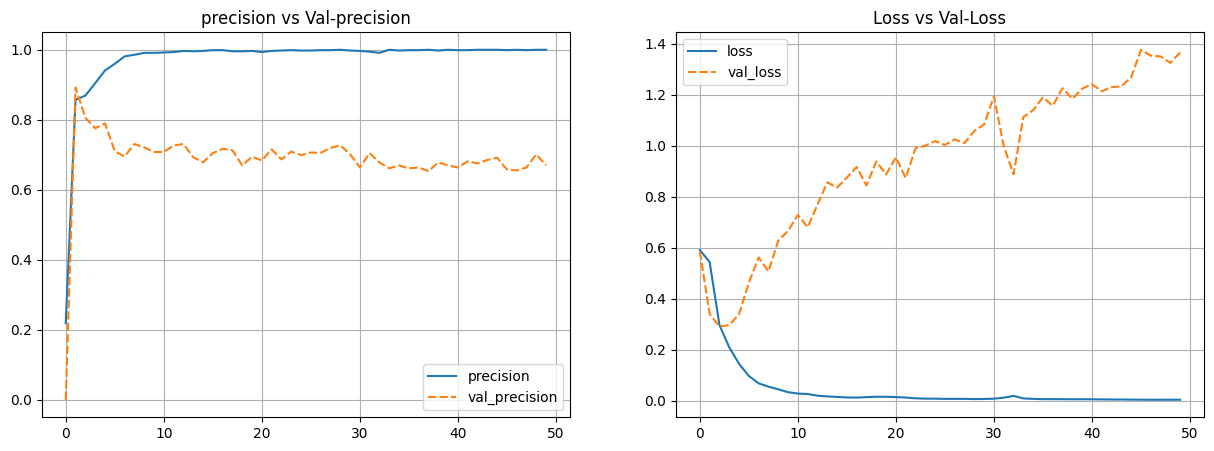

In [35]:
# Plot Training Results

model_gru_hist_df = pd.DataFrame(model_gru_hist.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=model_gru_hist_df[['precision', 'val_precision']])
plt.grid()
plt.title('precision vs Val-precision')

plt.subplot(1, 2, 2)
sns.lineplot(data=model_gru_hist_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.show()

In [36]:
# Prediksi label kelas untuk data trainidasi
y_pred_train = model_gru.predict(X_train)
y_pred_train_class = np.where(y_pred_train >= 0.5,1,0)

print(classification_report(y_train,y_pred_train_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2551
           1       1.00      1.00      1.00       923

    accuracy                           1.00      3474
   macro avg       1.00      1.00      1.00      3474
weighted avg       1.00      1.00      1.00      3474



In [37]:
# Prediksi label kelas untuk data trainidasi
y_pred_test = model_gru.predict(X_test)
y_pred_test_class = np.where(y_pred_test >= 0.5,1,0)

print(classification_report(y_test,y_pred_test_class))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       501
           1       0.70      0.69      0.69       181

    accuracy                           0.84       682
   macro avg       0.79      0.79      0.79       682
weighted avg       0.84      0.84      0.84       682



# 9. LSTM Affiliate

## 9.1 - Model Training

In [38]:
# Model Training using LSTM

## Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

## Define the architecture
model_lstm = Sequential()
model_lstm.add(text_vectorization)
model_lstm.add(embedding)
model_lstm.add(LSTM(32, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed)))
model_lstm.add(LSTM(32, kernel_initializer=tf.keras.initializers.GlorotUniform(seed)))
model_lstm.add(Dense(1, activation='sigmoid'))

model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics='Precision')

model_lstm_hist = model_lstm.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

Epoch 1/50
109/109 [==============================] - 5s 24ms/step - loss: 0.3820 - precision: 0.8627 - val_loss: 0.3064 - val_precision: 0.7647
Epoch 2/50
109/109 [==============================] - 2s 16ms/step - loss: 0.1350 - precision: 0.9257 - val_loss: 0.4708 - val_precision: 0.7692
Epoch 3/50
109/109 [==============================] - 2s 16ms/step - loss: 0.0775 - precision: 0.9649 - val_loss: 0.4718 - val_precision: 0.7383
Epoch 4/50
109/109 [==============================] - 2s 16ms/step - loss: 0.0582 - precision: 0.9771 - val_loss: 0.6171 - val_precision: 0.6772
Epoch 5/50
109/109 [==============================] - 2s 16ms/step - loss: 0.0478 - precision: 0.9793 - val_loss: 0.5859 - val_precision: 0.7404
Epoch 6/50
109/109 [==============================] - 2s 16ms/step - loss: 0.0332 - precision: 0.9891 - val_loss: 0.5840 - val_precision: 0.7264
Epoch 7/50
109/109 [==============================] - 2s 16ms/step - loss: 0.0288 - precision: 0.9924 - val_loss: 0.8753 - val_pre

## 9.2 - Model Evaluation

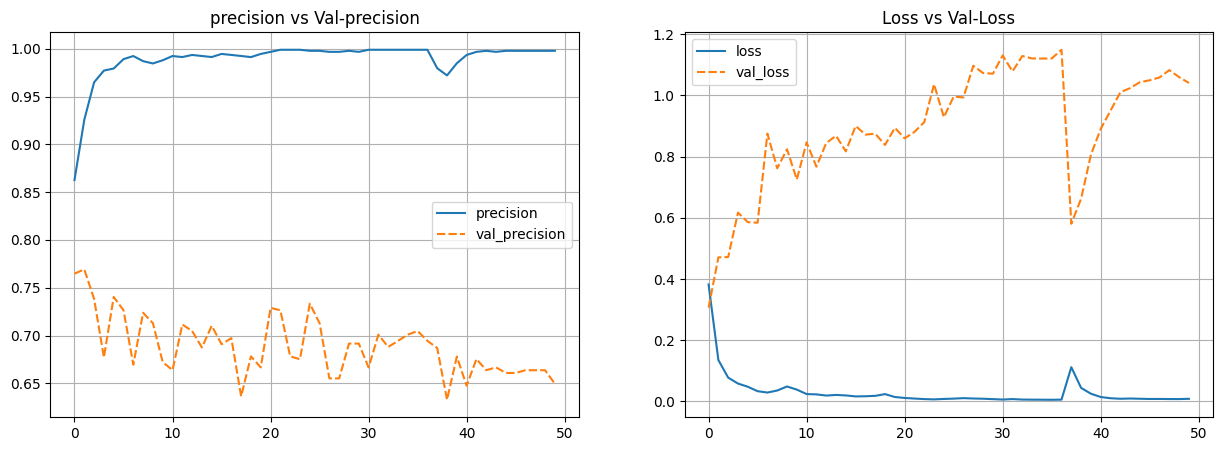

In [39]:
# Plot Training Results

model_lstm_hist_df = pd.DataFrame(model_lstm_hist.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=model_lstm_hist_df[['precision', 'val_precision']])
plt.grid()
plt.title('precision vs Val-precision')

plt.subplot(1, 2, 2)
sns.lineplot(data=model_lstm_hist_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.show()

In [40]:
# Prediksi label kelas untuk data trainidasi
y_pred_train = model_lstm.predict(X_train)
y_pred_train_class = np.where(y_pred_train >= 0.5,1,0)

print(classification_report(y_train,y_pred_train_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2551
           1       1.00      1.00      1.00       923

    accuracy                           1.00      3474
   macro avg       1.00      1.00      1.00      3474
weighted avg       1.00      1.00      1.00      3474



In [41]:
# Prediksi label kelas untuk data trainidasi
y_pred_test = model_lstm.predict(X_test)
y_pred_test_class = np.where(y_pred_test >= 0.5,1,0)

print(classification_report(y_test,y_pred_test_class))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       501
           1       0.69      0.74      0.71       181

    accuracy                           0.84       682
   macro avg       0.80      0.81      0.80       682
weighted avg       0.85      0.84      0.84       682



# 10. Bidirectional GRU Affiliate

## 10.1 - Model Training Affiliate

In [42]:
# Model Training using GRU

## Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

## Define the architecture
model_gru_bidirectional = Sequential()
model_gru_bidirectional.add(text_vectorization)
model_gru_bidirectional.add(embedding)
model_gru_bidirectional.add(Bidirectional(GRU(8, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
model_gru_bidirectional.add(Bidirectional(GRU(8, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
model_gru_bidirectional.add(Dense(1, activation='sigmoid'))

model_gru_bidirectional.compile(loss='binary_crossentropy', optimizer='adam', metrics=['Precision'])

model_gru_bidirectional_hist = model_gru_bidirectional.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

Epoch 1/50
109/109 [==============================] - 6s 25ms/step - loss: 0.4070 - precision: 0.8353 - val_loss: 0.3037 - val_precision: 0.7723
Epoch 2/50
109/109 [==============================] - 2s 18ms/step - loss: 0.1609 - precision: 0.9330 - val_loss: 0.3516 - val_precision: 0.7526
Epoch 3/50
109/109 [==============================] - 2s 18ms/step - loss: 0.0797 - precision: 0.9713 - val_loss: 0.4484 - val_precision: 0.7264
Epoch 4/50
109/109 [==============================] - 2s 19ms/step - loss: 0.0431 - precision: 0.9815 - val_loss: 0.5199 - val_precision: 0.7000
Epoch 5/50
109/109 [==============================] - 2s 18ms/step - loss: 0.0269 - precision: 0.9946 - val_loss: 0.5836 - val_precision: 0.6972
Epoch 6/50
109/109 [==============================] - 2s 18ms/step - loss: 0.0209 - precision: 0.9946 - val_loss: 0.6399 - val_precision: 0.6696
Epoch 7/50
109/109 [==============================] - 2s 18ms/step - loss: 0.0150 - precision: 0.9978 - val_loss: 0.7103 - val_pre

## 10.2 - Model Evaluation Affiliate

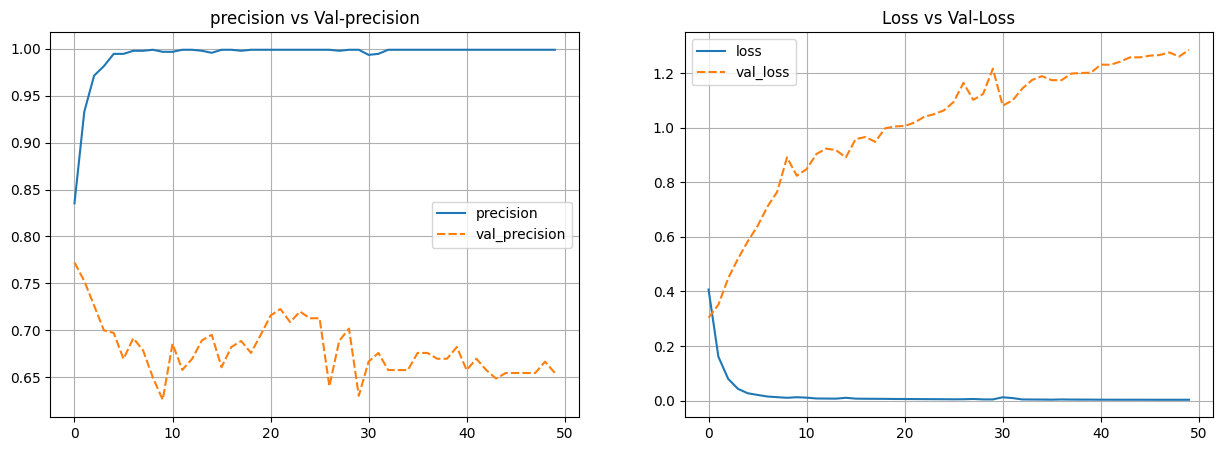

In [43]:
# Plot Training Results

model_gru_bidirectional_hist_df = pd.DataFrame(model_gru_bidirectional_hist.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=model_gru_bidirectional_hist_df[['precision', 'val_precision']])
plt.grid()
plt.title('precision vs Val-precision')

plt.subplot(1, 2, 2)
sns.lineplot(data=model_gru_bidirectional_hist_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.show()

In [44]:
# Prediksi label kelas untuk data trainidasi
y_pred_train = model_gru_bidirectional.predict(X_train)
y_pred_train_class = np.where(y_pred_train >= 0.5,1,0)

print(classification_report(y_train,y_pred_train_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2551
           1       1.00      1.00      1.00       923

    accuracy                           1.00      3474
   macro avg       1.00      1.00      1.00      3474
weighted avg       1.00      1.00      1.00      3474



In [45]:
# Prediksi label kelas untuk data trainidasi
y_pred_test = model_gru_bidirectional.predict(X_test)
y_pred_test_class = np.where(y_pred_test >= 0.5,1,0)

print(classification_report(y_test,y_pred_test_class))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       501
           1       0.69      0.70      0.70       181

    accuracy                           0.84       682
   macro avg       0.79      0.79      0.79       682
weighted avg       0.84      0.84      0.84       682



# 11. Bidirectional LSTM Affiliate

## 11.1 - Model Training Affiliate

In [46]:
# Model Training using LSTM

## Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

## Define the architecture
model_lstm_bidirectional = Sequential()
model_lstm_bidirectional.add(text_vectorization)
model_lstm_bidirectional.add(embedding)
model_lstm_bidirectional.add(Bidirectional(LSTM(8, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
model_lstm_bidirectional.add(Bidirectional(LSTM(8, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
model_lstm_bidirectional.add(Dense(1, activation='sigmoid'))

model_lstm_bidirectional.compile(loss='binary_crossentropy', optimizer='adam', metrics=['Precision'])

model_lstm_bidirectional_hist = model_lstm_bidirectional.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

Epoch 1/50
109/109 [==============================] - 8s 39ms/step - loss: 0.3993 - precision: 0.9704 - val_loss: 0.3338 - val_precision: 0.7800
Epoch 2/50
109/109 [==============================] - 3s 26ms/step - loss: 0.1212 - precision: 0.9558 - val_loss: 0.4080 - val_precision: 0.7500
Epoch 3/50
109/109 [==============================] - 3s 25ms/step - loss: 0.0469 - precision: 0.9847 - val_loss: 0.5675 - val_precision: 0.6909
Epoch 4/50
109/109 [==============================] - 3s 25ms/step - loss: 0.0311 - precision: 0.9902 - val_loss: 0.5989 - val_precision: 0.7129
Epoch 5/50
109/109 [==============================] - 3s 25ms/step - loss: 0.0199 - precision: 0.9956 - val_loss: 0.6854 - val_precision: 0.6944
Epoch 6/50
109/109 [==============================] - 3s 25ms/step - loss: 0.0148 - precision: 0.9967 - val_loss: 0.7592 - val_precision: 0.6696
Epoch 7/50
109/109 [==============================] - 3s 25ms/step - loss: 0.0136 - precision: 0.9967 - val_loss: 0.7988 - val_pre

## 11.2 - Model Evaluation Affiliate

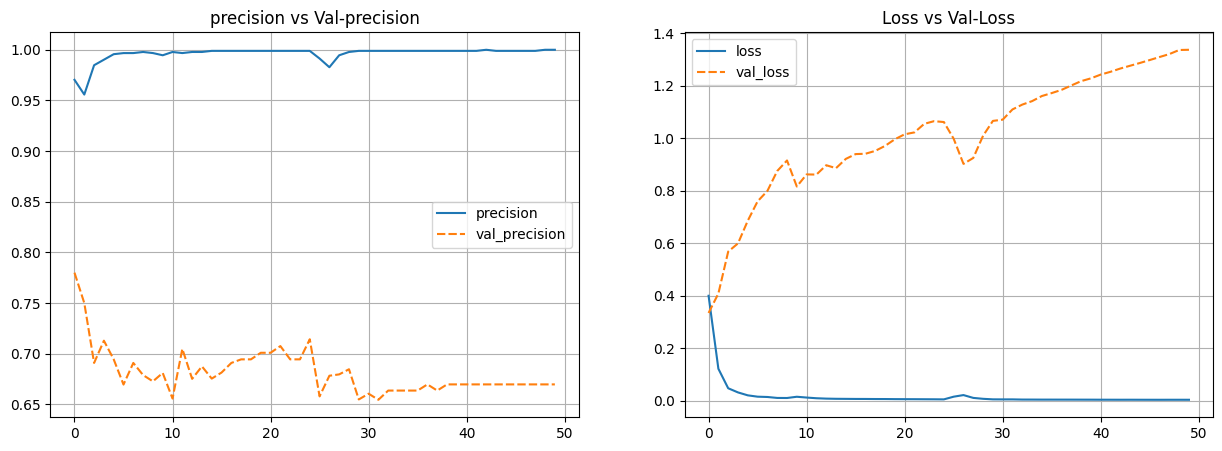

In [47]:
# Plot Training Results

model_lstm_bidirectional_hist_df = pd.DataFrame(model_lstm_bidirectional_hist.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=model_lstm_bidirectional_hist_df[['precision', 'val_precision']])
plt.grid()
plt.title('precision vs Val-precision')

plt.subplot(1, 2, 2)
sns.lineplot(data=model_lstm_bidirectional_hist_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.show()

In [48]:
# Prediksi label kelas untuk data trainidasi
y_pred_train = model_lstm_bidirectional.predict(X_train)
y_pred_train_class = np.where(y_pred_train >= 0.5,1,0)

print(classification_report(y_train,y_pred_train_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2551
           1       1.00      1.00      1.00       923

    accuracy                           1.00      3474
   macro avg       1.00      1.00      1.00      3474
weighted avg       1.00      1.00      1.00      3474



In [49]:
# Prediksi label kelas untuk data trainidasi
y_pred_test = model_lstm_bidirectional.predict(X_test)
y_pred_test_class = np.where(y_pred_test >= 0.5,1,0)

print(classification_report(y_test,y_pred_test_class))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       501
           1       0.67      0.71      0.69       181

    accuracy                           0.83       682
   macro avg       0.78      0.79      0.79       682
weighted avg       0.83      0.83      0.83       682



# Tuning Affiliate

## 1.LSTM tuning

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dropout, Dense, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

## Definisikan arsitektur
model_lstm_tuning = Sequential()
model_lstm_tuning.add(text_vectorization)
model_lstm_tuning.add(embedding)
model_lstm_tuning.add(LSTM(32, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed)))
model_lstm_tuning.add(Dropout(0.6))
model_lstm_tuning.add(BatchNormalization())
model_lstm_tuning.add(LSTM(8, kernel_initializer=tf.keras.initializers.GlorotUniform(seed)))
model_lstm_tuning.add(Dropout(0.6))
model_lstm_tuning.add(Dense(1, activation='sigmoid'))

# Set optimizer dengan learning rate lebih rendah
optimizer = Adam(learning_rate=0.0001)
model_lstm_tuning.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['Precision'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model_lstm_tuning_hist = model_lstm_tuning.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/100
109/109 [==============================] - 5s 26ms/step - loss: 0.6720 - precision: 0.2832 - val_loss: 0.6210 - val_precision: 0.3333
Epoch 2/100
109/109 [==============================] - 2s 19ms/step - loss: 0.5863 - precision: 0.4297 - val_loss: 0.5251 - val_precision: 0.7692
Epoch 3/100
109/109 [==============================] - 2s 19ms/step - loss: 0.3943 - precision: 0.8384 - val_loss: 0.3641 - val_precision: 0.7551
Epoch 4/100
109/109 [==============================] - 2s 18ms/step - loss: 0.3066 - precision: 0.9148 - val_loss: 0.3866 - val_precision: 0.6937
Epoch 5/100
109/109 [==============================] - 2s 19ms/step - loss: 0.2495 - precision: 0.9418 - val_loss: 0.4048 - val_precision: 0.7184
Epoch 6/100
109/109 [==============================] - 2s 18ms/step - loss: 0.2257 - precision: 0.9441 - val_loss: 0.4183 - val_precision: 0.7075
Epoch 7/100
109/109 [==============================] - 2s 18ms/step - loss: 0.1968 - precision: 0.9595 - val_loss: 0.4456 - 

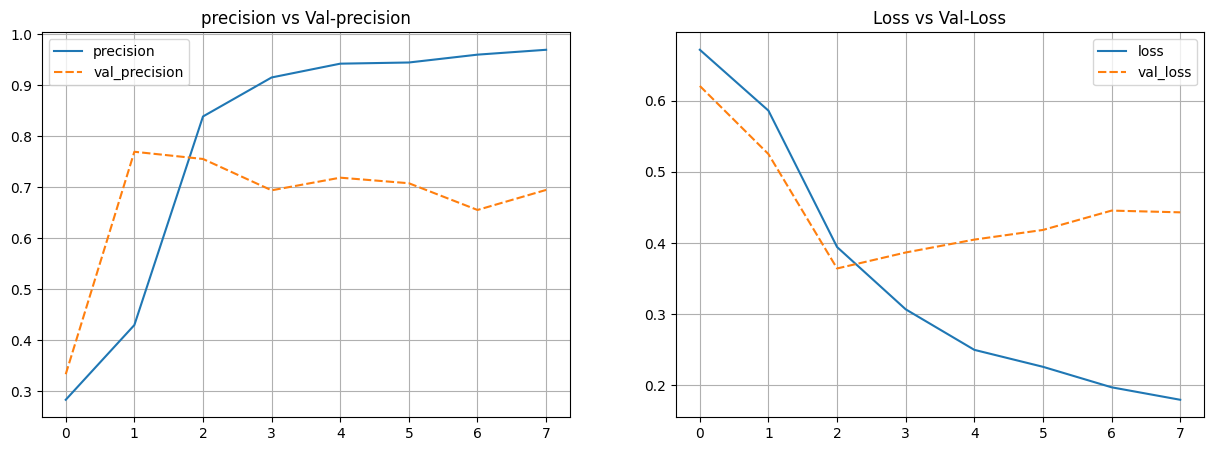

In [51]:
# Plot Training Results

model_lstm_tuning_hist_df = pd.DataFrame(model_lstm_tuning_hist.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=model_lstm_tuning_hist_df[['precision', 'val_precision']])
plt.grid()
plt.title('precision vs Val-precision')

plt.subplot(1, 2, 2)
sns.lineplot(data=model_lstm_tuning_hist_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.show()

In [52]:
# Prediksi label kelas untuk data trainidasi
y_pred_train = model_lstm_tuning.predict(X_train)
y_pred_train_class = np.where(y_pred_train >= 0.5,1,0)

print(classification_report(y_train,y_pred_train_class))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      2551
           1       0.96      0.84      0.90       923

    accuracy                           0.95      3474
   macro avg       0.95      0.91      0.93      3474
weighted avg       0.95      0.95      0.95      3474



In [53]:
# Prediksi label kelas untuk data trainidasi
y_pred_test = model_lstm_tuning.predict(X_test)
y_pred_test_class = np.where(y_pred_test >= 0.5,1,0)

print(classification_report(y_test,y_pred_test_class))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92       501
           1       0.81      0.69      0.75       181

    accuracy                           0.88       682
   macro avg       0.85      0.82      0.83       682
weighted avg       0.87      0.88      0.87       682



## 2. LSTM Bidirectional Tuning

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dropout, Dense, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

## Definisikan arsitektur
model_lstm_bidirectional_tuning = Sequential()
model_lstm_bidirectional_tuning.add(text_vectorization)
model_lstm_bidirectional_tuning.add(embedding)
model_lstm_bidirectional_tuning.add(Bidirectional(LSTM(32, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
model_lstm_bidirectional_tuning.add(Dropout(0.6))
model_lstm_bidirectional_tuning.add(BatchNormalization())
model_lstm_bidirectional_tuning.add(Bidirectional(LSTM(8, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
model_lstm_bidirectional_tuning.add(Dropout(0.6))
model_lstm_bidirectional_tuning.add(Dense(1, activation='sigmoid'))

# Set optimizer dengan learning rate lebih rendah
optimizer = Adam(learning_rate=0.0001)
model_lstm_bidirectional_tuning.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['Precision'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model_lstm_bidirectional_tuning_hist = model_lstm_bidirectional_tuning.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/100
109/109 [==============================] - 10s 51ms/step - loss: 0.5365 - precision: 0.5627 - val_loss: 0.5873 - val_precision: 0.9750
Epoch 2/100
109/109 [==============================] - 3s 31ms/step - loss: 0.3779 - precision: 0.8882 - val_loss: 0.4569 - val_precision: 0.9365
Epoch 3/100
109/109 [==============================] - 3s 27ms/step - loss: 0.3071 - precision: 0.9190 - val_loss: 0.3751 - val_precision: 0.8148
Epoch 4/100
109/109 [==============================] - 3s 27ms/step - loss: 0.2609 - precision: 0.9483 - val_loss: 0.3525 - val_precision: 0.7684
Epoch 5/100
109/109 [==============================] - 3s 27ms/step - loss: 0.2307 - precision: 0.9514 - val_loss: 0.3560 - val_precision: 0.7667
Epoch 6/100
109/109 [==============================] - 3s 27ms/step - loss: 0.1888 - precision: 0.9604 - val_loss: 0.3812 - val_precision: 0.7400
Epoch 7/100
109/109 [==============================] - 3s 28ms/step - loss: 0.1484 - precision: 0.9706 - val_loss: 0.4404 -

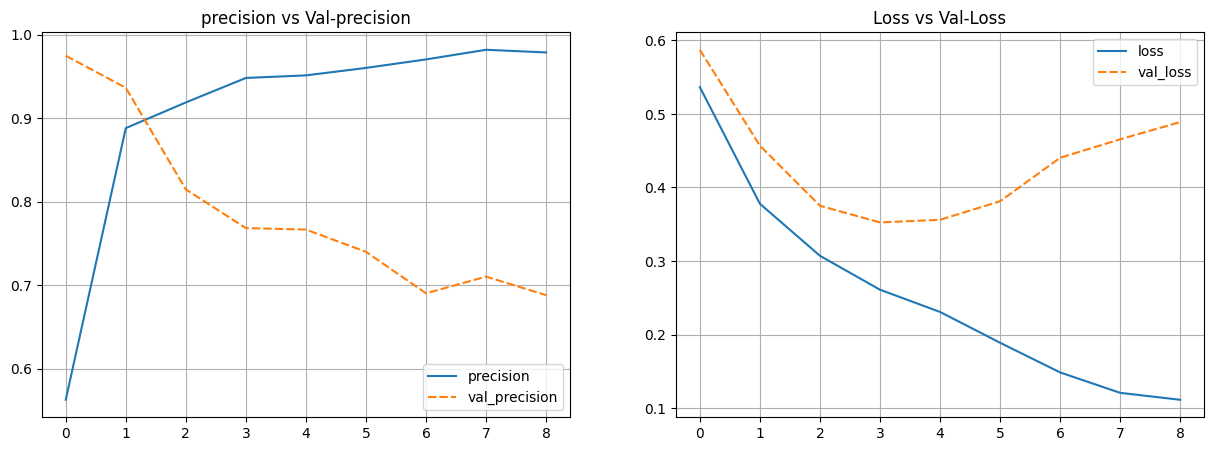

In [55]:
# Plot Training Results

model_lstm_bidirectional_tuning_hist_df = pd.DataFrame(model_lstm_bidirectional_tuning_hist.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=model_lstm_bidirectional_tuning_hist_df[['precision', 'val_precision']])
plt.grid()
plt.title('precision vs Val-precision')

plt.subplot(1, 2, 2)
sns.lineplot(data=model_lstm_bidirectional_tuning_hist_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.show()

In [56]:
# Prediksi label kelas untuk data trainidasi
y_pred_train = model_lstm_bidirectional_tuning.predict(X_train)
y_pred_train_class = np.where(y_pred_train >= 0.5,1,0)

print(classification_report(y_train,y_pred_train_class))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2551
           1       0.99      0.88      0.93       923

    accuracy                           0.97      3474
   macro avg       0.98      0.94      0.96      3474
weighted avg       0.97      0.97      0.97      3474



In [57]:
# Prediksi label kelas untuk data trainidasi
y_pred_test = model_lstm_bidirectional_tuning.predict(X_test)
y_pred_test_class = np.where(y_pred_test >= 0.5,1,0)

print(classification_report(y_test,y_pred_test_class))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       501
           1       0.82      0.70      0.75       181

    accuracy                           0.88       682
   macro avg       0.86      0.82      0.84       682
weighted avg       0.88      0.88      0.88       682



# Saving Model

In [58]:
model_lstm_tuning.trainable = False
model_lstm_tuning.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 35)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 35, 128)           374784    
                                                                 
 lstm (LSTM)                 (None, 35, 32)            20608     
                                                                 
 dropout (Dropout)           (None, 35, 32)            0         
                                                                 
 batch_normalization (BatchN  (None, 35, 32)           128       
 ormalization)                                                   
                                                                 
 lstm_1 (LSTM)               (None, 8)                 1

In [59]:
model_lstm_tuning.save('model_affiliate', save_format='tf')

INFO:tensorflow:Assets written to: model_affiliate\assets


INFO:tensorflow:Assets written to: model_affiliate\assets


# 14. MODEL SENTIMENT

In [60]:
df_sentiment = df[(df['Affiliate']==0) & (df['Sentiment'] != 2) & (df['Sentiment'] != 3)]

In [61]:
df_sentiment['Sentiment'].value_counts()

Sentiment
1    1505
0    1106
Name: count, dtype: int64

# 15. Target Conversion

## - Split Data Train, Validation, and Test

In [62]:
# Data Splitting

X_train_val, X_test, y_train_val, y_test = train_test_split(df_sentiment.text_processed_f,
                                                            df_sentiment.Sentiment,
                                                            test_size=0.15,
                                                            random_state=20,
                                                            stratify=df_sentiment.Sentiment)

X_train, X_val, y_train, y_val = train_test_split(X_train_val,
                                                  y_train_val,
                                                  test_size=0.10,
                                                  random_state=20,
                                                  stratify=y_train_val)

print('Train Size : ', X_train.shape)
print('Val Size   : ', X_val.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (1997,)
Val Size   :  (222,)
Test Size  :  (392,)


# 16. Model Building

## 16.1 - Text Vectorization

In [63]:
Vectorize = CountVectorizer()
X_train_vec = Vectorize.fit_transform(X_train)
X_test_vec = Vectorize.transform(X_test)

X_train_vec

<1997x2442 sparse matrix of type '<class 'numpy.int64'>'
	with 17461 stored elements in Compressed Sparse Row format>

In [64]:
# Finding the Number of Vocabs and Max Token Length in One Document

total_vocab = len(Vectorize.vocabulary_.keys())
max_sen_len = max([len(i.split(" ")) for i in X_train])

print('Total Vocab : ', total_vocab)
print('Maximum Sentence Length : ', max_sen_len, 'tokens')

Total Vocab :  2442
Maximum Sentence Length :  35 tokens


In [65]:
# Text Vectorization

text_vectorization = TextVectorization(max_tokens=total_vocab,
                                       standardize="lower_and_strip_punctuation",
                                       split="whitespace",
                                       ngrams=None,
                                       output_mode="int",
                                       output_sequence_length=max_sen_len,
                                       input_shape=(1,)) # Only use in Sequential API

text_vectorization.adapt(X_train)

## 16.2 - Word Embedding

In [66]:
# Embedding

embedding = Embedding(input_dim=total_vocab,
                      output_dim=128,
                      embeddings_initializer="uniform",
                      input_length=max_sen_len)

# 17. GRU Sentiment

## 17.1 - Model Training

In [67]:
# Model Training using LSTM

## Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

## Define the architecture
model_gru_sentiment = Sequential()
model_gru_sentiment.add(text_vectorization)
model_gru_sentiment.add(embedding)
model_gru_sentiment.add(GRU(32, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed)))
model_gru_sentiment.add(GRU(32, kernel_initializer=tf.keras.initializers.GlorotUniform(seed)))
model_gru_sentiment.add(Dense(1, activation='sigmoid'))
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_gru_sentiment.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')

model_gru_sentiment_hist = model_gru_sentiment.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

Epoch 1/50
63/63 [==============================] - 3s 25ms/step - loss: 0.6832 - accuracy: 0.5764 - val_loss: 0.6815 - val_accuracy: 0.5766
Epoch 2/50
63/63 [==============================] - 1s 13ms/step - loss: 0.6826 - accuracy: 0.5764 - val_loss: 0.6815 - val_accuracy: 0.5766
Epoch 3/50
63/63 [==============================] - 1s 12ms/step - loss: 0.6820 - accuracy: 0.5764 - val_loss: 0.6815 - val_accuracy: 0.5766
Epoch 4/50
63/63 [==============================] - 1s 12ms/step - loss: 0.6765 - accuracy: 0.5819 - val_loss: 0.6448 - val_accuracy: 0.6036
Epoch 5/50
63/63 [==============================] - 1s 12ms/step - loss: 0.5682 - accuracy: 0.7131 - val_loss: 0.6021 - val_accuracy: 0.6757
Epoch 6/50
63/63 [==============================] - 1s 12ms/step - loss: 0.3795 - accuracy: 0.8343 - val_loss: 0.6159 - val_accuracy: 0.6937
Epoch 7/50
63/63 [==============================] - 1s 12ms/step - loss: 0.2786 - accuracy: 0.8923 - val_loss: 0.6850 - val_accuracy: 0.7297
Epoch 8/50
63

## 8.2 - Model Evaluation

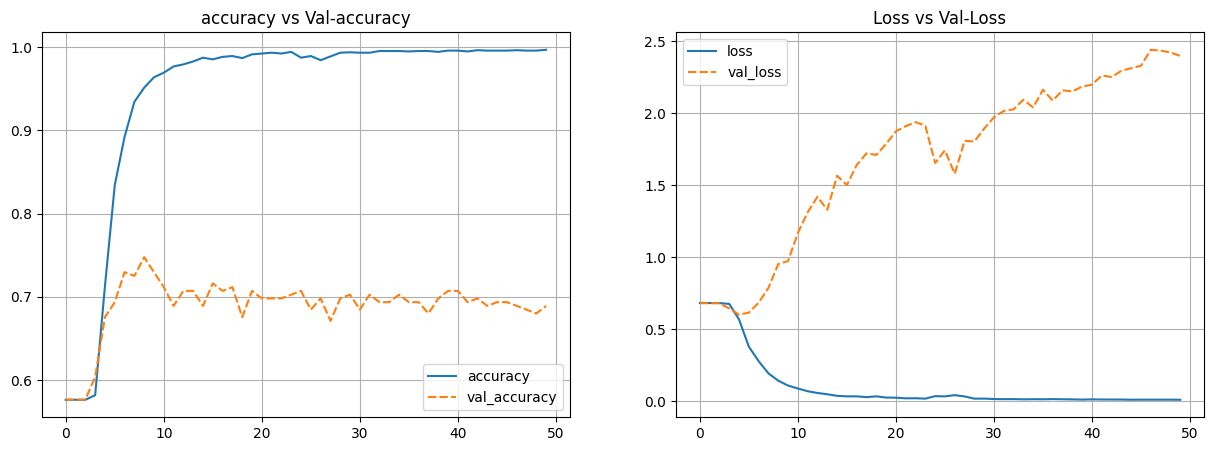

In [68]:
# Plot Training Results

model_gru_sentiment_hist_df = pd.DataFrame(model_gru_sentiment_hist.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=model_gru_sentiment_hist_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('accuracy vs Val-accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(data=model_gru_sentiment_hist_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.show()

In [69]:
# Prediksi label kelas untuk data trainidasi
y_pred_train = model_gru_sentiment.predict(X_train)
y_pred_train_class = np.where(y_pred_train >= 0.5,1,0)

print(classification_report(y_train,y_pred_train_class))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       846
           1       0.99      1.00      1.00      1151

    accuracy                           1.00      1997
   macro avg       1.00      1.00      1.00      1997
weighted avg       1.00      1.00      1.00      1997



In [70]:
# Prediksi label kelas untuk data trainidasi
y_pred_test = model_gru_sentiment.predict(X_test)
y_pred_test_class = np.where(y_pred_test >= 0.5,1,0)

print(classification_report(y_test,y_pred_test_class))

              precision    recall  f1-score   support

           0       0.57      0.49      0.53       166
           1       0.66      0.73      0.69       226

    accuracy                           0.63       392
   macro avg       0.62      0.61      0.61       392
weighted avg       0.62      0.63      0.63       392



# 9. LSTM Sentiment

## 9.1 - Model Training

In [71]:
# Model Training using LSTM

## Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

## Define the architecture
model_lstm_sentiment = Sequential()
model_lstm_sentiment.add(text_vectorization)
model_lstm_sentiment.add(embedding)
model_lstm_sentiment.add(LSTM(32, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed)))
model_lstm_sentiment.add(LSTM(32, kernel_initializer=tf.keras.initializers.GlorotUniform(seed)))
model_lstm_sentiment.add(Dense(1, activation='sigmoid'))

model_lstm_sentiment.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')

model_lstm_sentiment_hist = model_lstm_sentiment.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

Epoch 1/50
63/63 [==============================] - 4s 28ms/step - loss: 0.6092 - accuracy: 0.6445 - val_loss: 0.8749 - val_accuracy: 0.6802
Epoch 2/50
63/63 [==============================] - 1s 16ms/step - loss: 0.3788 - accuracy: 0.8743 - val_loss: 0.7513 - val_accuracy: 0.7162
Epoch 3/50
63/63 [==============================] - 1s 16ms/step - loss: 0.2765 - accuracy: 0.9159 - val_loss: 0.7895 - val_accuracy: 0.6802
Epoch 4/50
63/63 [==============================] - 1s 15ms/step - loss: 0.2081 - accuracy: 0.9409 - val_loss: 1.0842 - val_accuracy: 0.6486
Epoch 5/50
63/63 [==============================] - 1s 15ms/step - loss: 0.1681 - accuracy: 0.9569 - val_loss: 0.9030 - val_accuracy: 0.7027
Epoch 6/50
63/63 [==============================] - 1s 15ms/step - loss: 0.1419 - accuracy: 0.9589 - val_loss: 0.9134 - val_accuracy: 0.6892
Epoch 7/50
63/63 [==============================] - 1s 16ms/step - loss: 0.1229 - accuracy: 0.9654 - val_loss: 1.1647 - val_accuracy: 0.6892
Epoch 8/50
63

## 9.2 - Model Evaluation

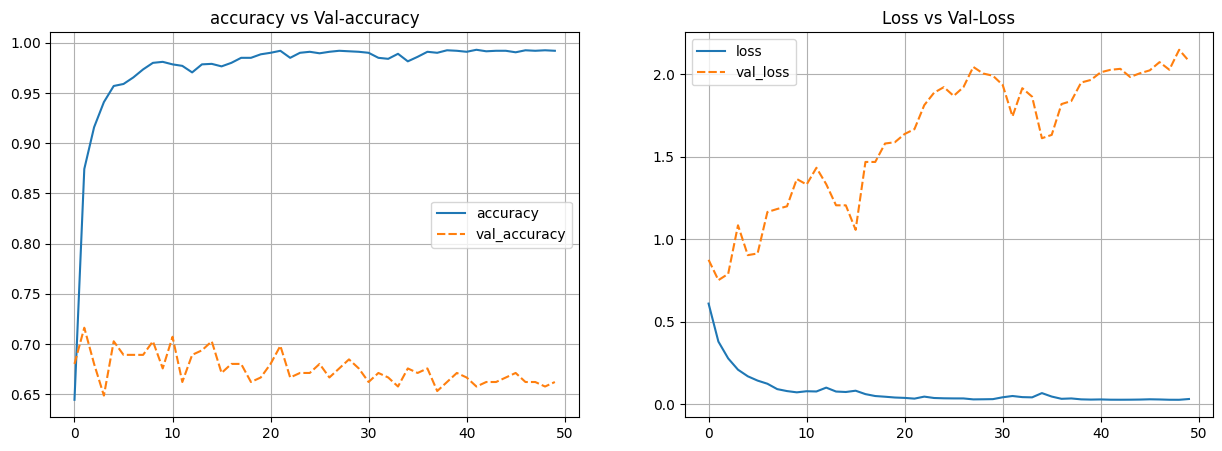

In [72]:
# Plot Training Results

model_lstm_sentiment_hist_df = pd.DataFrame(model_lstm_sentiment_hist.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=model_lstm_sentiment_hist_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('accuracy vs Val-accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(data=model_lstm_sentiment_hist_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.show()

In [73]:
# Prediksi label kelas untuk data trainidasi
y_pred_train = model_lstm_sentiment.predict(X_train)
y_pred_train_class = np.where(y_pred_train >= 0.5,1,0)

print(classification_report(y_train,y_pred_train_class))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       846
           1       0.99      0.99      0.99      1151

    accuracy                           0.99      1997
   macro avg       0.99      0.99      0.99      1997
weighted avg       0.99      0.99      0.99      1997



In [74]:
# Prediksi label kelas untuk data trainidasi
y_pred_test = model_lstm_sentiment.predict(X_test)
y_pred_test_class = np.where(y_pred_test >= 0.5,1,0)

print(classification_report(y_test,y_pred_test_class))

              precision    recall  f1-score   support

           0       0.55      0.54      0.55       166
           1       0.67      0.67      0.67       226

    accuracy                           0.62       392
   macro avg       0.61      0.61      0.61       392
weighted avg       0.62      0.62      0.62       392



# 10. Bidirectional GRU Sentiment

## 10.1 - Model Training Sentiment

In [75]:
# Model Training using GRU

## Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

## Define the architecture
model_gru_sentiment_bidirectional = Sequential()
model_gru_sentiment_bidirectional.add(text_vectorization)
model_gru_sentiment_bidirectional.add(embedding)
model_gru_sentiment_bidirectional.add(Bidirectional(GRU(8, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
model_gru_sentiment_bidirectional.add(Dropout(0.7))
model_gru_sentiment_bidirectional.add(Bidirectional(GRU(8, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
model_gru_sentiment_bidirectional.add(Dropout(0.7))
model_gru_sentiment_bidirectional.add(Dense(1, activation='sigmoid'))

model_gru_sentiment_bidirectional.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_gru_sentiment_bidirectional_hist = model_gru_sentiment_bidirectional.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

Epoch 1/50
63/63 [==============================] - 7s 31ms/step - loss: 0.6433 - accuracy: 0.6304 - val_loss: 0.6310 - val_accuracy: 0.6396
Epoch 2/50
63/63 [==============================] - 1s 18ms/step - loss: 0.5144 - accuracy: 0.7772 - val_loss: 0.6062 - val_accuracy: 0.6892
Epoch 3/50
63/63 [==============================] - 1s 18ms/step - loss: 0.3836 - accuracy: 0.8603 - val_loss: 0.6847 - val_accuracy: 0.6847
Epoch 4/50
63/63 [==============================] - 1s 18ms/step - loss: 0.2749 - accuracy: 0.9124 - val_loss: 0.8091 - val_accuracy: 0.6802
Epoch 5/50
63/63 [==============================] - 1s 18ms/step - loss: 0.2203 - accuracy: 0.9279 - val_loss: 0.9220 - val_accuracy: 0.6757
Epoch 6/50
63/63 [==============================] - 1s 18ms/step - loss: 0.1723 - accuracy: 0.9534 - val_loss: 1.2063 - val_accuracy: 0.6892
Epoch 7/50
63/63 [==============================] - 1s 18ms/step - loss: 0.1135 - accuracy: 0.9710 - val_loss: 1.2950 - val_accuracy: 0.6982
Epoch 8/50
63

## 10.2 - Model Evaluation Sentiment

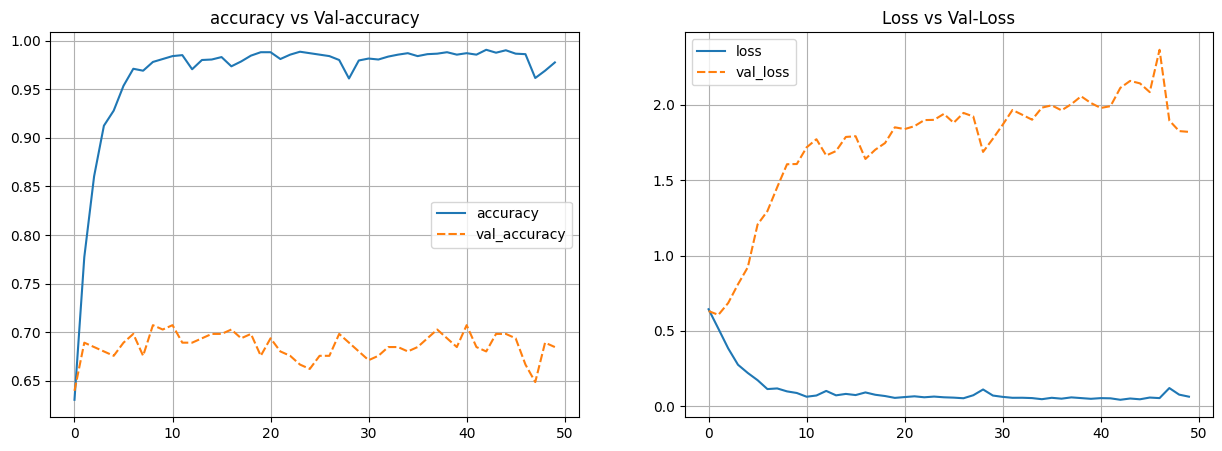

In [76]:
# Plot Training Results

model_gru_sentiment_bidirectional_hist_df = pd.DataFrame(model_gru_sentiment_bidirectional_hist.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=model_gru_sentiment_bidirectional_hist_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('accuracy vs Val-accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(data=model_gru_sentiment_bidirectional_hist_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.show()

In [77]:
# Prediksi label kelas untuk data trainidasi
y_pred_train = model_gru_sentiment_bidirectional.predict(X_train)
y_pred_train_class = np.where(y_pred_train >= 0.5,1,0)

print(classification_report(y_train,y_pred_train_class))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       846
           1       0.99      1.00      0.99      1151

    accuracy                           0.99      1997
   macro avg       0.99      0.99      0.99      1997
weighted avg       0.99      0.99      0.99      1997



In [78]:
# Prediksi label kelas untuk data trainidasi
y_pred_test = model_gru_sentiment_bidirectional.predict(X_test)
y_pred_test_class = np.where(y_pred_test >= 0.5,1,0)

print(classification_report(y_test,y_pred_test_class))

              precision    recall  f1-score   support

           0       0.57      0.54      0.55       166
           1       0.67      0.70      0.69       226

    accuracy                           0.63       392
   macro avg       0.62      0.62      0.62       392
weighted avg       0.63      0.63      0.63       392



# 11. Bidirectional LSTM Sentiment

## 11.1 - Model Training Sentiment

In [79]:
# Model Training using LSTM

## Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

## Define the architecture
model_lstm_sentiment_bidirectional = Sequential()
model_lstm_sentiment_bidirectional.add(text_vectorization)
model_lstm_sentiment_bidirectional.add(embedding)
model_lstm_sentiment_bidirectional.add(Bidirectional(LSTM(8, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
model_lstm_sentiment_bidirectional.add(Bidirectional(LSTM(8, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
model_lstm_sentiment_bidirectional.add(Dense(1, activation='sigmoid'))

model_lstm_sentiment_bidirectional.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_lstm_sentiment_bidirectional_hist = model_lstm_sentiment_bidirectional.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

Epoch 1/50
63/63 [==============================] - 6s 44ms/step - loss: 0.5742 - accuracy: 0.7061 - val_loss: 0.5994 - val_accuracy: 0.7072
Epoch 2/50
63/63 [==============================] - 2s 27ms/step - loss: 0.2384 - accuracy: 0.9469 - val_loss: 0.7585 - val_accuracy: 0.6892
Epoch 3/50
63/63 [==============================] - 2s 25ms/step - loss: 0.1307 - accuracy: 0.9659 - val_loss: 0.8704 - val_accuracy: 0.7027
Epoch 4/50
63/63 [==============================] - 2s 25ms/step - loss: 0.0785 - accuracy: 0.9810 - val_loss: 0.9994 - val_accuracy: 0.6892
Epoch 5/50
63/63 [==============================] - 2s 26ms/step - loss: 0.1776 - accuracy: 0.9384 - val_loss: 0.8392 - val_accuracy: 0.6982
Epoch 6/50
63/63 [==============================] - 2s 27ms/step - loss: 0.1077 - accuracy: 0.9790 - val_loss: 0.9309 - val_accuracy: 0.7027
Epoch 7/50
63/63 [==============================] - 2s 24ms/step - loss: 0.0749 - accuracy: 0.9835 - val_loss: 1.0045 - val_accuracy: 0.6982
Epoch 8/50
63

## 11.2 - Model Evaluation Sentiment

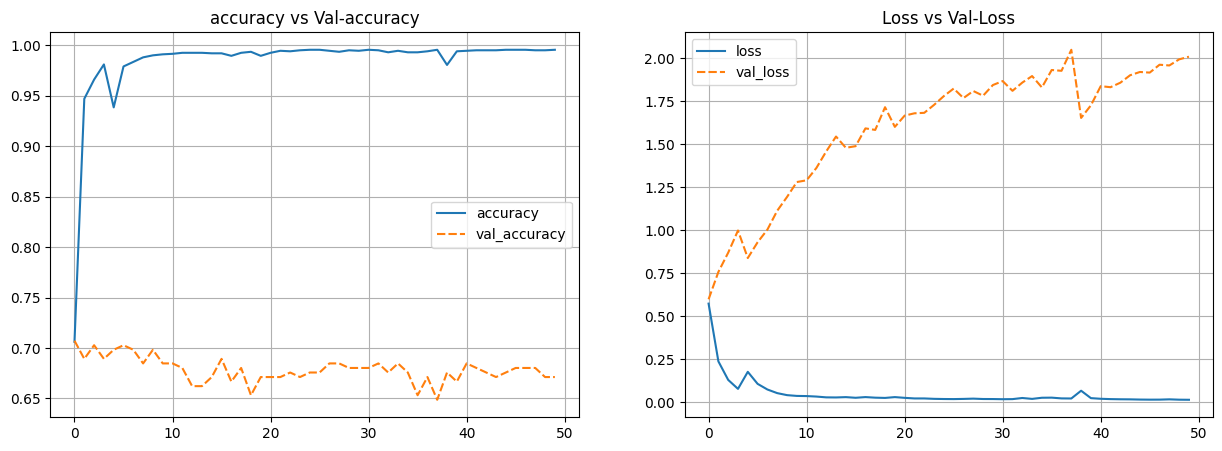

In [80]:
# Plot Training Results

model_lstm_sentiment_bidirectional_hist_df = pd.DataFrame(model_lstm_sentiment_bidirectional_hist.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=model_lstm_sentiment_bidirectional_hist_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('accuracy vs Val-accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(data=model_lstm_sentiment_bidirectional_hist_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.show()

In [81]:
# Prediksi label kelas untuk data trainidasi
y_pred_train = model_lstm_sentiment_bidirectional.predict(X_train)
y_pred_train_class = np.where(y_pred_train >= 0.5,1,0)

print(classification_report(y_train,y_pred_train_class))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       846
           1       0.99      1.00      1.00      1151

    accuracy                           1.00      1997
   macro avg       1.00      0.99      1.00      1997
weighted avg       1.00      1.00      1.00      1997



In [82]:
# Prediksi label kelas untuk data trainidasi
y_pred_test = model_lstm_sentiment_bidirectional.predict(X_test)
y_pred_test_class = np.where(y_pred_test >= 0.5,1,0)

print(classification_report(y_test,y_pred_test_class))

              precision    recall  f1-score   support

           0       0.60      0.54      0.57       166
           1       0.68      0.74      0.71       226

    accuracy                           0.65       392
   macro avg       0.64      0.64      0.64       392
weighted avg       0.65      0.65      0.65       392



# Tuning Sentiment

## 1.LSTM tuning

In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dropout, Dense, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

## Definisikan arsitektur
model_lstm_sentiment_tuning = Sequential()
model_lstm_sentiment_tuning.add(text_vectorization)
model_lstm_sentiment_tuning.add(embedding)
model_lstm_sentiment_tuning.add(LSTM(32, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed)))
model_lstm_sentiment_tuning.add(Dropout(0.6))
model_lstm_sentiment_tuning.add(BatchNormalization())
model_lstm_sentiment_tuning.add(LSTM(8, kernel_initializer=tf.keras.initializers.GlorotUniform(seed)))
model_lstm_sentiment_tuning.add(Dropout(0.6))
model_lstm_sentiment_tuning.add(Dense(1, activation='sigmoid'))

# Set optimizer dengan learning rate lebih rendah
optimizer = Adam(learning_rate=0.0001)
model_lstm_sentiment_tuning.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model_lstm_sentiment_tuning_hist = model_lstm_sentiment_tuning.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/100
63/63 [==============================] - 5s 45ms/step - loss: 0.7010 - accuracy: 0.5253 - val_loss: 0.6889 - val_accuracy: 0.5676
Epoch 2/100
63/63 [==============================] - 1s 21ms/step - loss: 0.7043 - accuracy: 0.5273 - val_loss: 0.6883 - val_accuracy: 0.5721
Epoch 3/100
63/63 [==============================] - 1s 18ms/step - loss: 0.6821 - accuracy: 0.5819 - val_loss: 0.6902 - val_accuracy: 0.6261
Epoch 4/100
63/63 [==============================] - 1s 18ms/step - loss: 0.6611 - accuracy: 0.6134 - val_loss: 0.6718 - val_accuracy: 0.5991
Epoch 5/100
63/63 [==============================] - 1s 20ms/step - loss: 0.5537 - accuracy: 0.7672 - val_loss: 0.6182 - val_accuracy: 0.6982
Epoch 6/100
63/63 [==============================] - 1s 18ms/step - loss: 0.4272 - accuracy: 0.9024 - val_loss: 0.6212 - val_accuracy: 0.6802
Epoch 7/100
63/63 [==============================] - 1s 18ms/step - loss: 0.3714 - accuracy: 0.9304 - val_loss: 0.6482 - val_accuracy: 0.6802
Epoch 

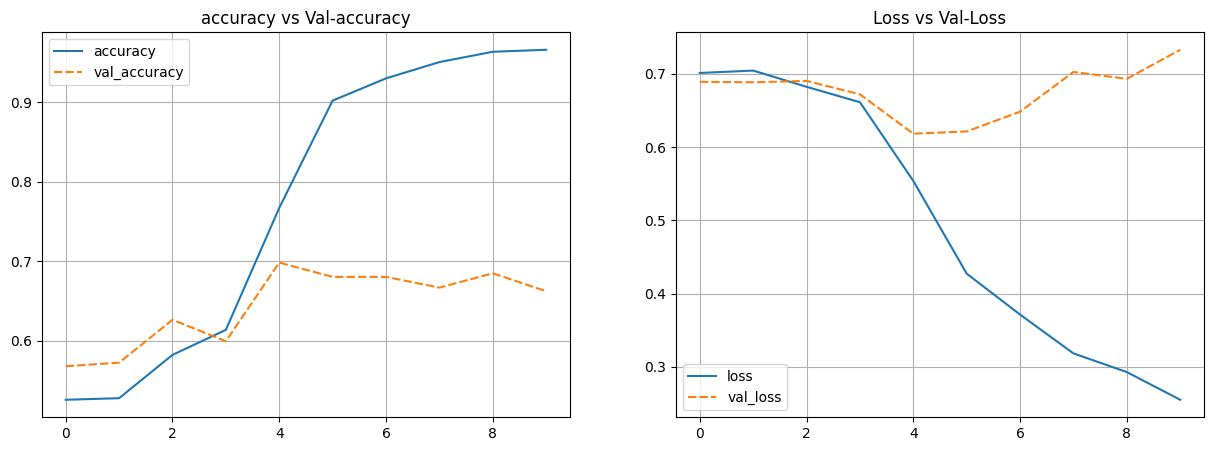

In [84]:
# Plot Training Results

model_lstm_sentiment_tuning_hist_df = pd.DataFrame(model_lstm_sentiment_tuning_hist.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=model_lstm_sentiment_tuning_hist_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('accuracy vs Val-accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(data=model_lstm_sentiment_tuning_hist_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.show()

In [85]:
# Prediksi label kelas untuk data trainidasi
y_pred_train = model_lstm_sentiment_tuning.predict(X_train)
y_pred_train_class = np.where(y_pred_train >= 0.5,1,0)

print(classification_report(y_train,y_pred_train_class))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92       846
           1       0.91      0.98      0.95      1151

    accuracy                           0.94      1997
   macro avg       0.94      0.93      0.93      1997
weighted avg       0.94      0.94      0.94      1997



In [86]:
# Prediksi label kelas untuk data trainidasi
y_pred_test = model_lstm_sentiment_tuning.predict(X_test)
y_pred_test_class = np.where(y_pred_test >= 0.5,1,0)

print(classification_report(y_test,y_pred_test_class))

              precision    recall  f1-score   support

           0       0.64      0.48      0.55       166
           1       0.68      0.80      0.73       226

    accuracy                           0.67       392
   macro avg       0.66      0.64      0.64       392
weighted avg       0.66      0.67      0.66       392



## 2. LSTM Bidirectional Tuning

In [87]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dropout, Dense, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam,Adamax,Nadam
from tensorflow.keras.regularizers import l2

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

## Definisikan arsitektur
model_lstm_sentiment_bidirectional_tuning = Sequential()
model_lstm_sentiment_bidirectional_tuning.add(text_vectorization)
model_lstm_sentiment_bidirectional_tuning.add(embedding)
model_lstm_sentiment_bidirectional_tuning.add(Bidirectional(LSTM(64, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
model_lstm_sentiment_bidirectional_tuning.add(Dropout(0.5))
model_lstm_sentiment_bidirectional_tuning.add(BatchNormalization())
model_lstm_sentiment_bidirectional_tuning.add(Bidirectional(LSTM(32, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
model_lstm_sentiment_bidirectional_tuning.add(Dropout(0.5))
model_lstm_sentiment_bidirectional_tuning.add(BatchNormalization())
model_lstm_sentiment_bidirectional_tuning.add(Bidirectional(LSTM(32, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
model_lstm_sentiment_bidirectional_tuning.add(Dropout(0.5))
# model_lstm_sentiment_bidirectional_tuning.add(BatchNormalization())
# model_lstm_sentiment_bidirectional_tuning.add(Bidirectional(LSTM(8, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
# model_lstm_sentiment_bidirectional_tuning.add(Dropout(0.5))
model_lstm_sentiment_bidirectional_tuning.add(Dense(1, activation='sigmoid'))


# Set optimizer dengan learning rate lebih rendah
optimizer = Adam(learning_rate=0.0001)
model_lstm_sentiment_bidirectional_tuning.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model_lstm_sentiment_bidirectional_tuning_hist = model_lstm_sentiment_bidirectional_tuning.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
63/63 [==============================] - 10s 66ms/step - loss: 0.6094 - accuracy: 0.6619 - val_loss: 0.6680 - val_accuracy: 0.6214
Epoch 2/100
63/63 [==============================] - 2s 37ms/step - loss: 0.3756 - accuracy: 0.8651 - val_loss: 0.6246 - val_accuracy: 0.6902
Epoch 3/100
63/63 [==============================] - 2s 33ms/step - loss: 0.1912 - accuracy: 0.9493 - val_loss: 0.8007 - val_accuracy: 0.6842
Epoch 4/100
63/63 [==============================] - 2s 34ms/step - loss: 0.1417 - accuracy: 0.9598 - val_loss: 0.9800 - val_accuracy: 0.6770
Epoch 5/100
63/63 [==============================] - 2s 34ms/step - loss: 0.1329 - accuracy: 0.9587 - val_loss: 1.1361 - val_accuracy: 0.6739
Epoch 6/100
63/63 [==============================] - 2s 33ms/step - loss: 0.0952 - accuracy: 0.9734 - val_loss: 1.2647 - val_accuracy: 0.6673
Epoch 7/100
63/63 [==============================] - 2s 33ms/step - loss: 0.1073 - accuracy: 0.9674 - val_loss: 1.3385 - val_accuracy: 0.6721
Epoch

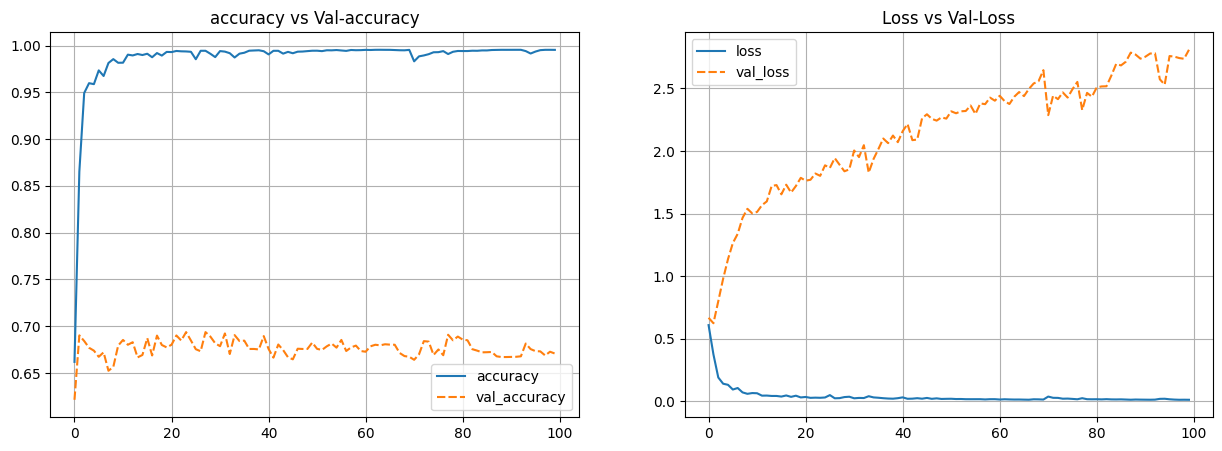

In [88]:
# Plot Training Results

model_lstm_sentiment_bidirectional_tuning_hist_df = pd.DataFrame(model_lstm_sentiment_bidirectional_tuning_hist.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=model_lstm_sentiment_bidirectional_tuning_hist_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('accuracy vs Val-accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(data=model_lstm_sentiment_bidirectional_tuning_hist_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.show()

In [89]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dropout, Dense, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import tensorflow as tf
import numpy as np

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

# Define the architecture
model_lstm_sentiment_bidirectional_tuning = Sequential()
model_lstm_sentiment_bidirectional_tuning.add(text_vectorization)
model_lstm_sentiment_bidirectional_tuning.add(embedding)
model_lstm_sentiment_bidirectional_tuning.add(Bidirectional(LSTM(64, return_sequences=True, 
                                                                 kernel_initializer=tf.keras.initializers.GlorotUniform(seed),
                                                                 kernel_regularizer=l2(0.001))))
model_lstm_sentiment_bidirectional_tuning.add(Dropout(0.5))
model_lstm_sentiment_bidirectional_tuning.add(BatchNormalization())
model_lstm_sentiment_bidirectional_tuning.add(Bidirectional(LSTM(32, return_sequences=True, 
                                                                 kernel_initializer=tf.keras.initializers.GlorotUniform(seed),
                                                                 kernel_regularizer=l2(0.001))))
model_lstm_sentiment_bidirectional_tuning.add(Dropout(0.5))
model_lstm_sentiment_bidirectional_tuning.add(BatchNormalization())
model_lstm_sentiment_bidirectional_tuning.add(Bidirectional(LSTM(32, kernel_initializer=tf.keras.initializers.GlorotUniform(seed),
                                                                 kernel_regularizer=l2(0.001))))
model_lstm_sentiment_bidirectional_tuning.add(Dropout(0.5))
model_lstm_sentiment_bidirectional_tuning.add(Dense(1, activation='sigmoid'))

# Set optimizer with a lower learning rate
optimizer = Adam(learning_rate=0.0001)
model_lstm_sentiment_bidirectional_tuning.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Use early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
model_lstm_sentiment_bidirectional_tuning_hist = model_lstm_sentiment_bidirectional_tuning.fit(
    X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=[early_stopping]
)


Epoch 1/100
63/63 [==============================] - 10s 68ms/step - loss: 1.3620 - accuracy: 0.6710 - val_loss: 1.4171 - val_accuracy: 0.6667
Epoch 2/100
63/63 [==============================] - 2s 39ms/step - loss: 1.1198 - accuracy: 0.8948 - val_loss: 1.3541 - val_accuracy: 0.6847
Epoch 3/100
63/63 [==============================] - 2s 39ms/step - loss: 0.9703 - accuracy: 0.9469 - val_loss: 1.3085 - val_accuracy: 0.6937
Epoch 4/100
63/63 [==============================] - 3s 40ms/step - loss: 0.8587 - accuracy: 0.9629 - val_loss: 1.3314 - val_accuracy: 0.6802
Epoch 5/100
63/63 [==============================] - 2s 39ms/step - loss: 0.7841 - accuracy: 0.9690 - val_loss: 1.4315 - val_accuracy: 0.6802
Epoch 6/100
63/63 [==============================] - 2s 39ms/step - loss: 0.7152 - accuracy: 0.9750 - val_loss: 1.5981 - val_accuracy: 0.6892
Epoch 7/100
63/63 [==============================] - 3s 40ms/step - loss: 0.6913 - accuracy: 0.9664 - val_loss: 1.7143 - val_accuracy: 0.6757
Epoch

In [194]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dropout, Dense, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import tensorflow as tf
import numpy as np

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

# Define the architecture
model_lstm_sentiment_bidirectional_tuning = Sequential()
model_lstm_sentiment_bidirectional_tuning.add(text_vectorization)
model_lstm_sentiment_bidirectional_tuning.add(embedding)
model_lstm_sentiment_bidirectional_tuning.add(Bidirectional(LSTM(8,  
                                                                 kernel_initializer=tf.keras.initializers.GlorotUniform(seed),
                                                                 )))
model_lstm_sentiment_bidirectional_tuning.add(Dropout(0.1))
model_lstm_sentiment_bidirectional_tuning.add(Dropout(0.1))
model_lstm_sentiment_bidirectional_tuning.add(Dense(1, activation='sigmoid'))

# Set optimizer with a lower learning rate
optimizer = Adam()
model_lstm_sentiment_bidirectional_tuning.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Use early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
model_lstm_sentiment_bidirectional_tuning_hist = model_lstm_sentiment_bidirectional_tuning.fit(
    X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=[early_stopping], batch_size=128
)


Epoch 1/100
16/16 [==============================] - 3s 69ms/step - loss: 0.4626 - accuracy: 0.8653 - val_loss: 0.5790 - val_accuracy: 0.7072
Epoch 2/100
16/16 [==============================] - 0s 23ms/step - loss: 0.3252 - accuracy: 0.9309 - val_loss: 0.5944 - val_accuracy: 0.7027
Epoch 3/100
16/16 [==============================] - 0s 20ms/step - loss: 0.2536 - accuracy: 0.9344 - val_loss: 0.6669 - val_accuracy: 0.6982
Epoch 4/100
16/16 [==============================] - 0s 19ms/step - loss: 0.2248 - accuracy: 0.9259 - val_loss: 0.6667 - val_accuracy: 0.6802
Epoch 5/100
16/16 [==============================] - 0s 19ms/step - loss: 0.1848 - accuracy: 0.9494 - val_loss: 0.6909 - val_accuracy: 0.6847
Epoch 6/100
16/16 [==============================] - 0s 19ms/step - loss: 0.1755 - accuracy: 0.9414 - val_loss: 0.7460 - val_accuracy: 0.6847


In [112]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, GRU, Dropout, Dense, LayerNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import tensorflow as tf
import numpy as np

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

# Define the architecture
model_gru_sentiment = Sequential()
model_gru_sentiment.add(text_vectorization)
model_gru_sentiment.add(embedding)
model_gru_sentiment.add(Bidirectional(GRU(128, return_sequences=True, 
                                          kernel_initializer=tf.keras.initializers.GlorotUniform(seed),
                                          kernel_regularizer=l2(0.01))))
model_gru_sentiment.add(BatchNormalization())
model_gru_sentiment.add(Dropout(0.5))
model_gru_sentiment.add(Bidirectional(GRU(8, kernel_initializer=tf.keras.initializers.GlorotUniform(seed),
                                          kernel_regularizer=l2(0.01))))
model_gru_sentiment.add(Dropout(0.5))
model_gru_sentiment.add(Dense(1, activation='sigmoid'))

# Set optimizer with a lower learning rate
optimizer = Adam(learning_rate=0.0001)
model_gru_sentiment.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Use early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
model_gru_sentiment_hist = model_gru_sentiment.fit(
    X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=[early_stopping], batch_size=64
)

Epoch 1/100
32/32 [==============================] - 6s 55ms/step - loss: 5.2460 - accuracy: 0.6570 - val_loss: 5.1597 - val_accuracy: 0.6126
Epoch 2/100
32/32 [==============================] - 1s 21ms/step - loss: 4.7963 - accuracy: 0.8147 - val_loss: 4.8856 - val_accuracy: 0.6261
Epoch 3/100
32/32 [==============================] - 1s 21ms/step - loss: 4.4702 - accuracy: 0.8813 - val_loss: 4.6282 - val_accuracy: 0.6306
Epoch 4/100
32/32 [==============================] - 1s 21ms/step - loss: 4.1851 - accuracy: 0.9139 - val_loss: 4.3841 - val_accuracy: 0.6532
Epoch 5/100
32/32 [==============================] - 1s 22ms/step - loss: 3.9316 - accuracy: 0.9324 - val_loss: 4.1555 - val_accuracy: 0.6622
Epoch 6/100
32/32 [==============================] - 1s 22ms/step - loss: 3.6878 - accuracy: 0.9469 - val_loss: 3.9438 - val_accuracy: 0.6712
Epoch 7/100
32/32 [==============================] - 1s 22ms/step - loss: 3.4735 - accuracy: 0.9529 - val_loss: 3.7453 - val_accuracy: 0.6622
Epoch 

#### GRU

In [113]:
# Prediksi label kelas untuk data trainidasi
y_pred_train = model_gru_sentiment.predict(X_train)
y_pred_train_class = np.where(y_pred_train >= 0.5,1,0)

print(classification_report(y_train,y_pred_train_class))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       846
           1       0.99      1.00      1.00      1151

    accuracy                           0.99      1997
   macro avg       1.00      0.99      0.99      1997
weighted avg       0.99      0.99      0.99      1997



In [114]:
# Prediksi label kelas untuk data trainidasi
y_pred_test = model_gru_sentiment.predict(X_test)
y_pred_test_class = np.where(y_pred_test >= 0.5,1,0)

print(classification_report(y_test,y_pred_test_class))

              precision    recall  f1-score   support

           0       0.58      0.57      0.58       166
           1       0.69      0.70      0.69       226

    accuracy                           0.65       392
   macro avg       0.64      0.64      0.64       392
weighted avg       0.64      0.65      0.64       392



#### LSTM

In [195]:
# Prediksi label kelas untuk data trainidasi
y_pred_train = model_lstm_sentiment_bidirectional_tuning.predict(X_train)
y_pred_train_class = np.where(y_pred_train >= 0.5,1,0)

print(classification_report(y_train,y_pred_train_class))

              precision    recall  f1-score   support

           0       0.97      0.85      0.90       846
           1       0.90      0.98      0.94      1151

    accuracy                           0.92      1997
   macro avg       0.93      0.91      0.92      1997
weighted avg       0.93      0.92      0.92      1997



In [196]:
# Prediksi label kelas untuk data trainidasi
y_pred_test = model_lstm_sentiment_bidirectional_tuning.predict(X_test)
y_pred_test_class = np.where(y_pred_test >= 0.5,1,0)

print(classification_report(y_test,y_pred_test_class))

              precision    recall  f1-score   support

           0       0.68      0.46      0.55       166
           1       0.68      0.84      0.75       226

    accuracy                           0.68       392
   macro avg       0.68      0.65      0.65       392
weighted avg       0.68      0.68      0.67       392



# Saving Model

```py
from tensorflow.keras.models import load_model

# simpan model
model_lstm_sentiment_bidirectional_tuning.save('model_sentiment')

# Memuat model dengan custom_objects
model_lstm_sentiment_bidirectional_tuning = load_model('model_sentiment', custom_objects={'LSTMCell': tf.keras.layers.LSTMCell})
```

In [197]:
model_lstm_sentiment_bidirectional_tuning.trainable = False
model_lstm_sentiment_bidirectional_tuning.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 35)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 35, 128)           312576    
                                                                 
 bidirectional (Bidirectiona  (None, 16)               8768      
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense (Dense)               (None, 1)                 1

In [199]:
model_lstm_sentiment_bidirectional_tuning.save('model_sentiment', save_format='tf')

INFO:tensorflow:Assets written to: model_sentiment\assets


INFO:tensorflow:Assets written to: model_sentiment\assets
